#**Lending Club Casestudy**

##**Understanding the data provided for case study**

#####Importing all the required libraries for the LC case study 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#####Reading the Lending Club Loan CSV file

In [3]:
lending = pd.read_csv("/content/drive/MyDrive/loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#####Validating few records to check the features available

In [4]:
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#####Validating the basic detail of the file using info and describe methods from Pandas

In [5]:
lending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
lending.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#####Checking the null percentage on each feature

In [7]:
((lending.isnull().sum()/len(lending))*100).sort_values(ascending=False)


verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

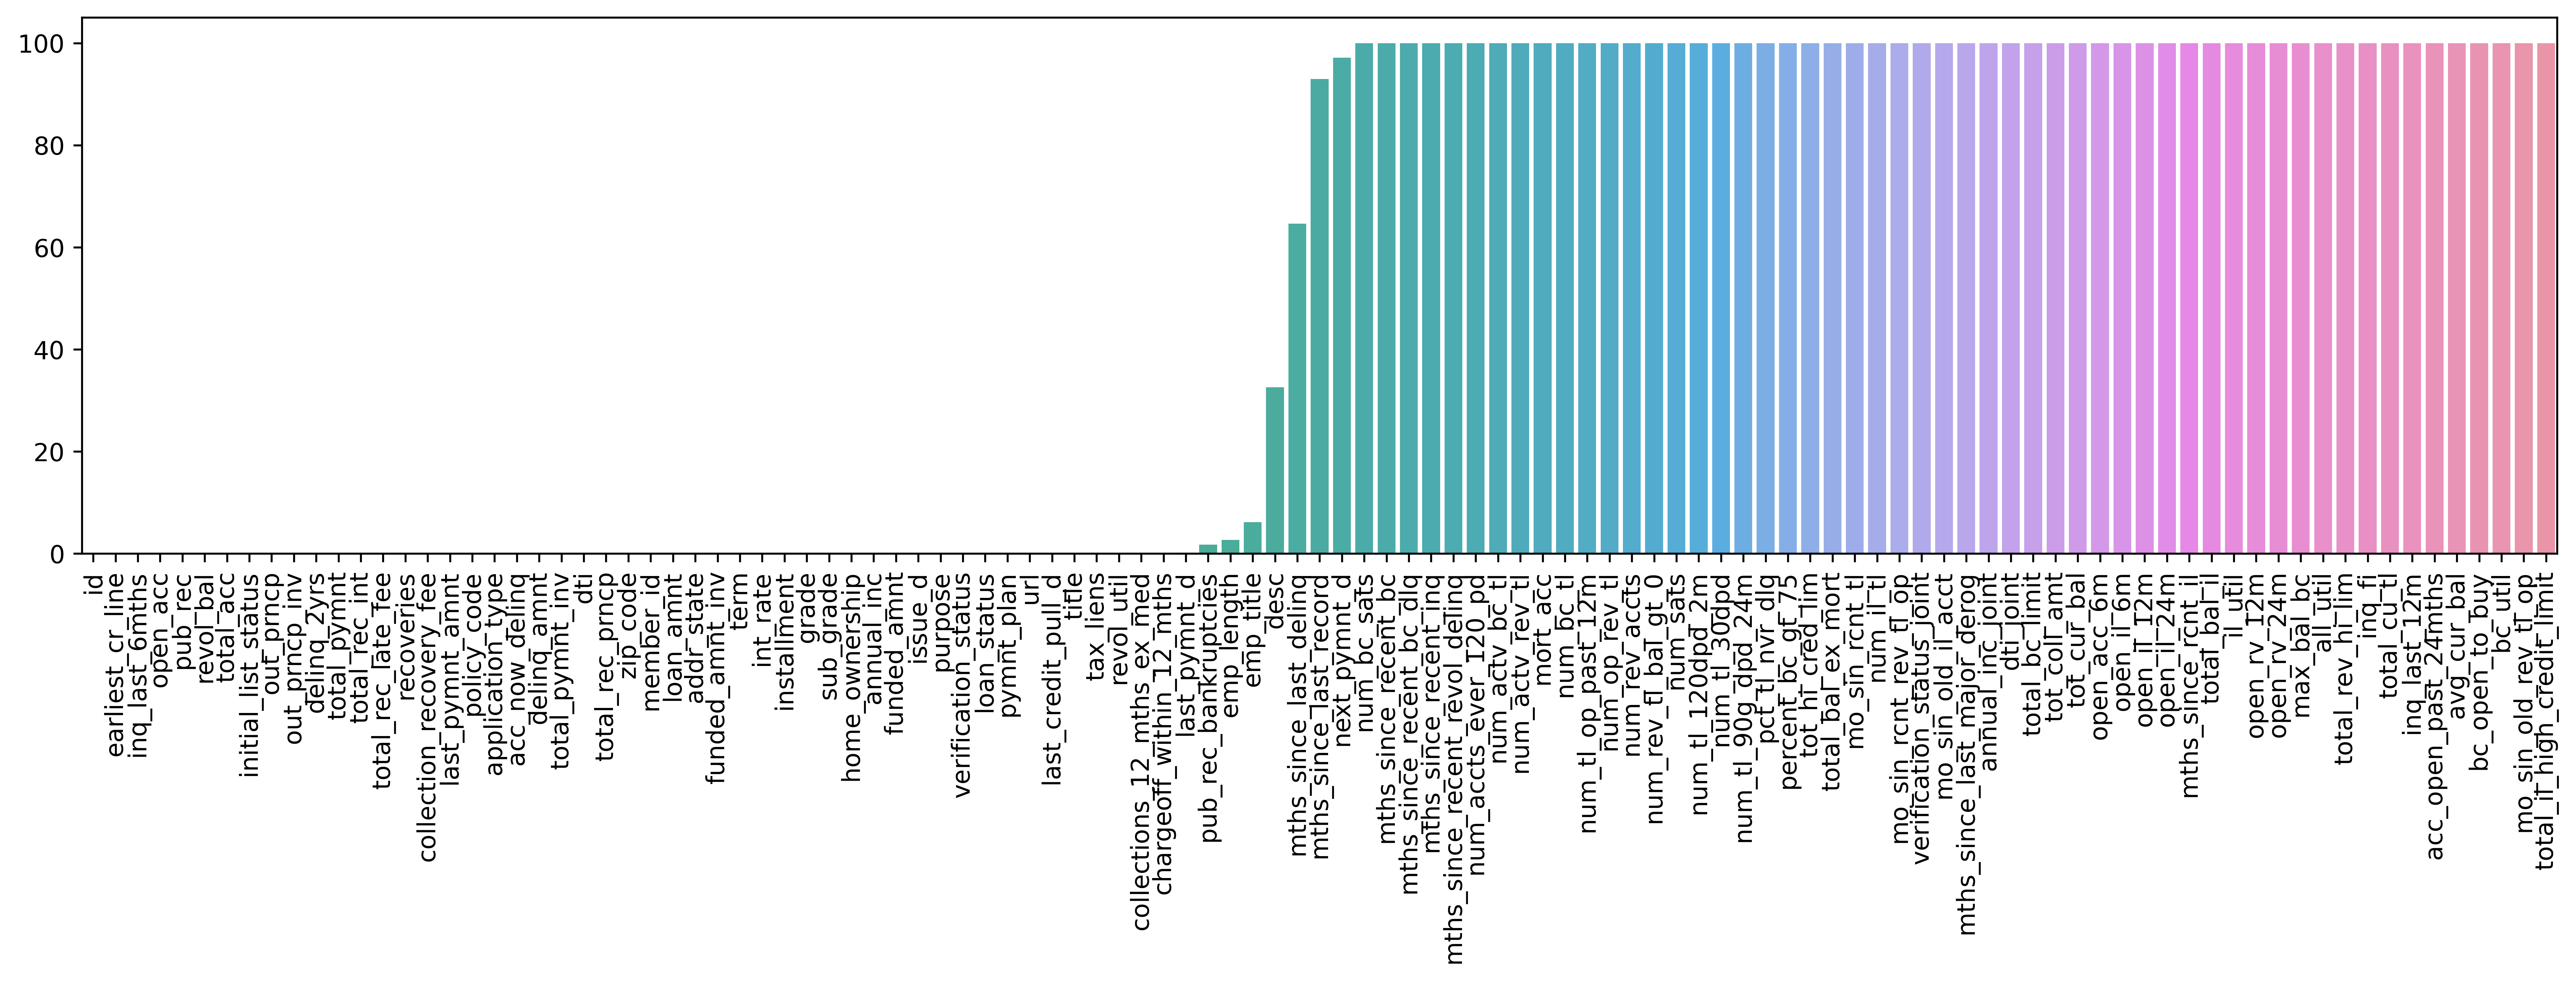

In [8]:
plt.figure(figsize=(18,4),dpi=600)
sns.barplot(y=((lending.isnull().sum()/len(lending))*100).sort_values(), x=((lending.isnull().sum()/len(lending))*100).sort_values().index)
plt.xticks(rotation=90);

##**Data Preprocessing** - Cleaning the data by removing unwanted columns and rows

#####Creating a new dataframe which is a sub set of original file with features having less that 50% of Null (dropping the features which has more than 50% Null)

In [9]:
lending_sub=lending[lending.columns[((lending.isnull().sum()/len(lending))*100 < 50)].to_list()]

In [10]:
lending[lending.columns[((lending.isnull().sum()/len(lending))*100 < 50)]]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


#####Visualizing the Null % using Bar Plot

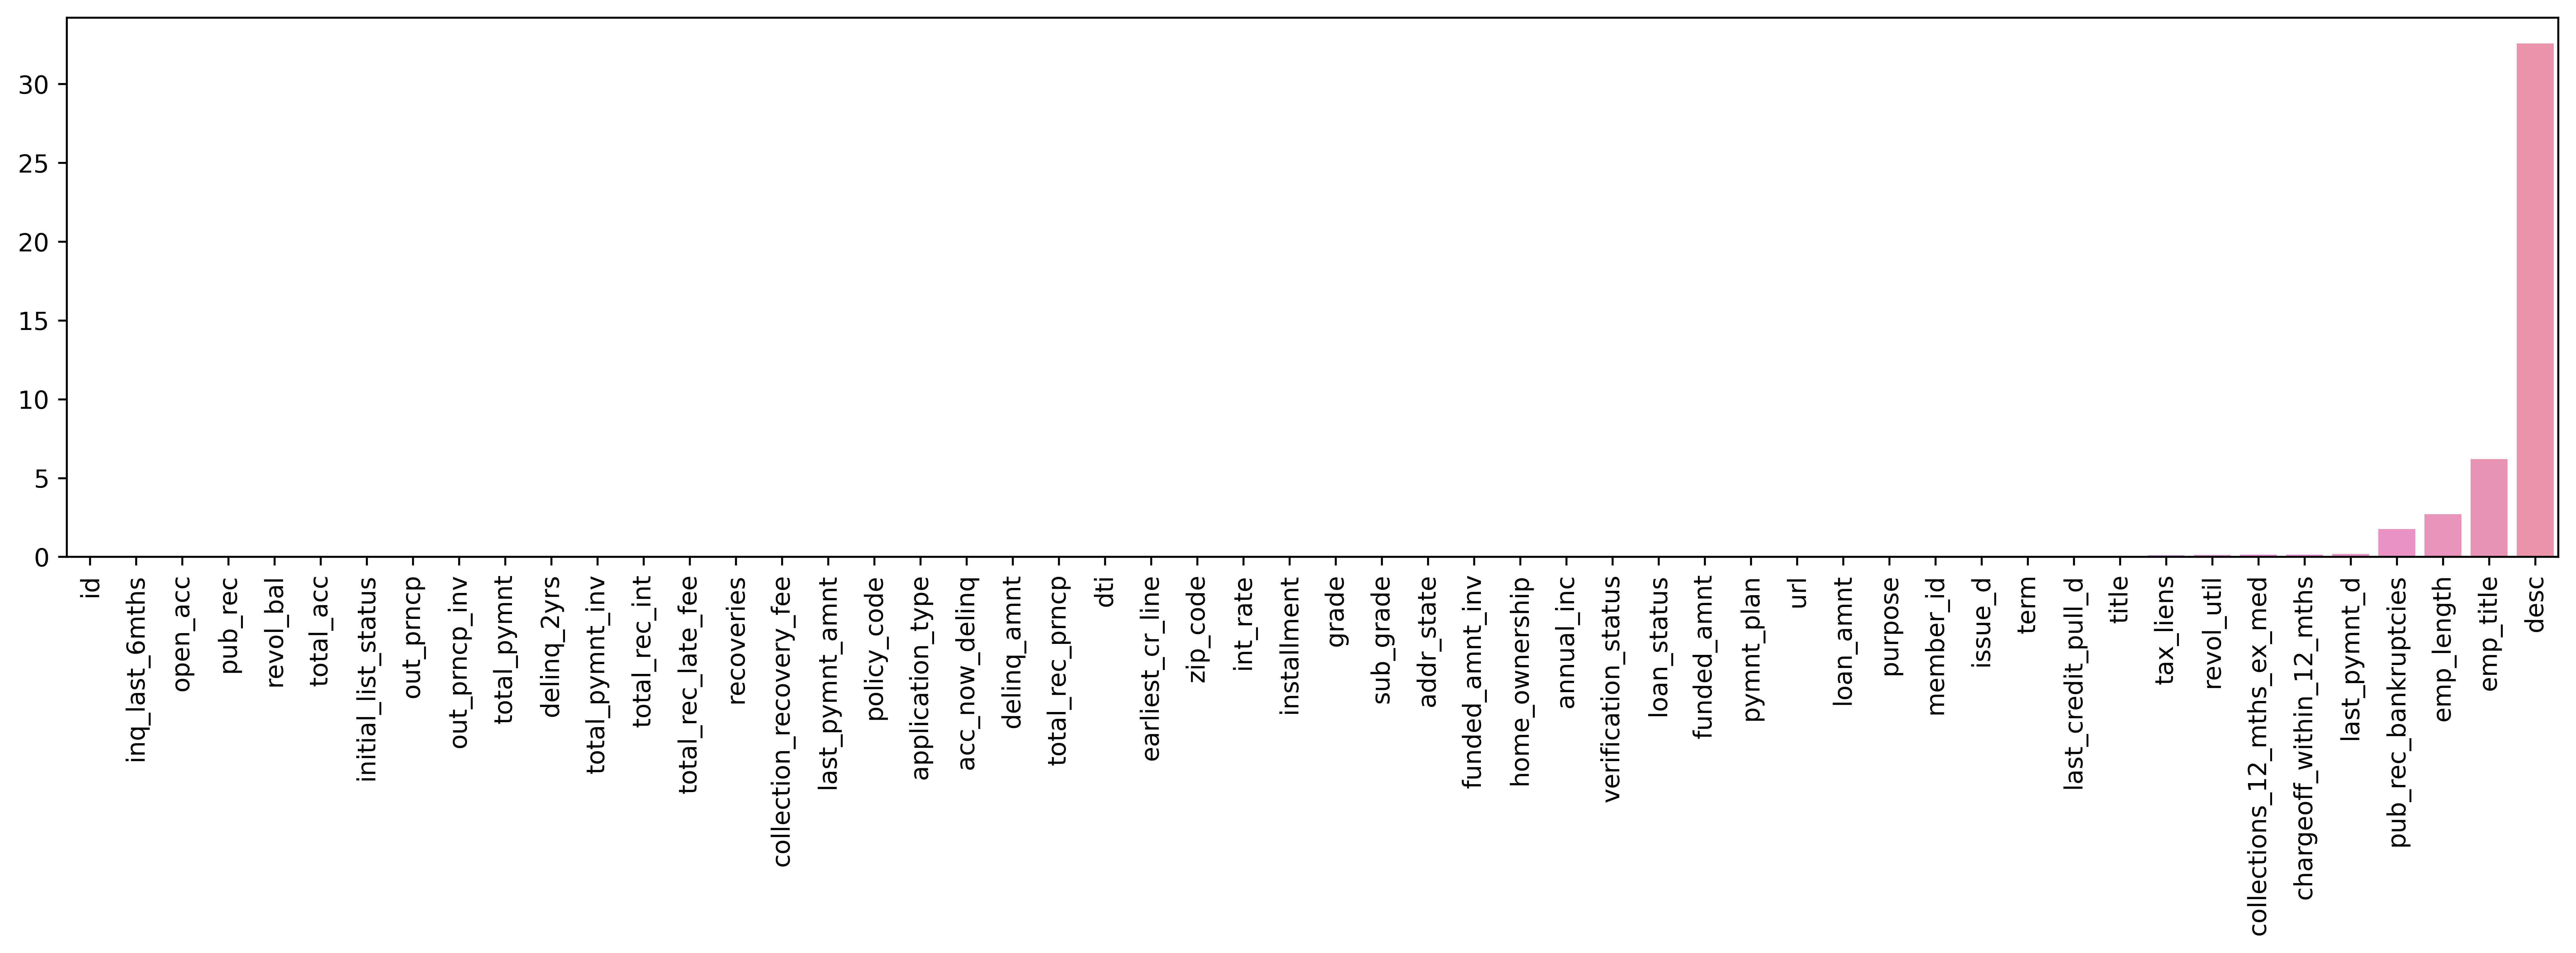

In [11]:
plt.figure(figsize=(18,4),dpi=600)
sns.barplot(y=((lending_sub.isnull().sum()/len(lending_sub))*100).sort_values(), x=((lending_sub.isnull().sum()/len(lending_sub))*100).sort_values().index)
plt.xticks(rotation=90);

In [12]:
lending_sub.value_counts()

id       member_id  loan_amnt  funded_amnt  funded_amnt_inv  term        int_rate  installment  grade  sub_grade  emp_title                      emp_length  home_ownership  annual_inc  verification_status  issue_d  loan_status  pymnt_plan  url                                                               desc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

######Dropping the features which are :


*   Customer identifiers which doesn't add value in analysis -
> **id, member_id**

*   Customer behaviour features - aren't available at the time of loan application, and thus they cannot be used as predictors for credit approval -
> **delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d and
application_type**


*   Features which has either single constant value (numeric or alphabet) or 0's or nulls or similar features or not required for analysis -
> **'desc'** - it has detailed information similar to 'purpose' 
>**'collections_12_mths_ex_med', 'policy_code', 'delinq_amnt', 'acc_now_delinq', 'chargeoff_within_12_mths'** - had either constant values or 0's and/or nulls.     
> **url, title, pymnt_plan, initial_list_status, pub_rec_bankruptcies, tax_liens** - not required for analysis







In [13]:
lending_sub.drop(['id',	'member_id', 'desc' ,	'pymnt_plan',	'url',	'title',	'delinq_2yrs',	'earliest_cr_line',	'inq_last_6mths',	'open_acc',	'pub_rec',	'revol_bal',	'revol_util',	'total_acc',	'out_prncp',	'out_prncp_inv',	'total_pymnt',	'total_pymnt_inv',	'total_rec_prncp',	'total_rec_int',	'total_rec_late_fee',	'recoveries',	'collection_recovery_fee',	'last_pymnt_d',	'last_pymnt_amnt',	'last_credit_pull_d',	'application_type',	'initial_list_status',	'collections_12_mths_ex_med',	'policy_code',	'delinq_amnt',	'pub_rec_bankruptcies',	'tax_liens', 'chargeoff_within_12_mths', 'acc_now_delinq'], axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#####Visualizing the attributes in 'loan_status' using histogram

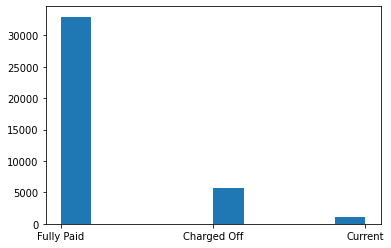

In [14]:
plt.hist(lending_sub['loan_status'],)
plt.show()

#####Dropping the rows which are for Current Loan_Status as these are the applicants who are in process of paying off loans

In [15]:
lending_sub = lending_sub[lending_sub['loan_status']!='Current']


#####After dropping the unwanted columns and rows, analyzing the null% on remaining features

In [16]:
((lending_sub.isnull().sum()/len(lending_sub))*100).sort_values(ascending=False)

emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
addr_state             0.000000
zip_code               0.000000
purpose                0.000000
loan_status            0.000000
issue_d                0.000000
verification_status    0.000000
annual_inc             0.000000
loan_amnt              0.000000
funded_amnt            0.000000
sub_grade              0.000000
grade                  0.000000
installment            0.000000
int_rate               0.000000
term                   0.000000
funded_amnt_inv        0.000000
dti                    0.000000
dtype: float64

In [17]:
lending_sub.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000


##**Feature Engineering**

#####Adding new features to analyze the delta of amounts [Loan amount, Funded amount and Funded Investor amount]

In [18]:
lending_sub['loan_amount_reviewer_delta'],lending_sub['loan_amount_inv_delta'],lending_sub['loan_amount_rev_inv_delta'] = lending_sub['funded_amnt']-lending_sub['loan_amnt'],lending_sub['funded_amnt_inv']-lending_sub['loan_amnt'],lending_sub['funded_amnt']-lending_sub['funded_amnt_inv']

#####Splitting the issue_d to month and year

In [19]:
lending_sub['issue_d'] = pd.to_datetime(lending_sub['issue_d'], format='%b-%y')
lending_sub['issue_year'] = pd.DatetimeIndex(lending_sub['issue_d']).year
lending_sub['issue_month'] = pd.DatetimeIndex(lending_sub['issue_d']).month

##**Data Analysis**

####**Univariate Analysis**

Verifying each feature for null value

In [20]:
lending_sub.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2386
emp_length                    1033
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
loan_amount_reviewer_delta       0
loan_amount_inv_delta            0
loan_amount_rev_inv_delta        0
issue_year                       0
issue_month                      0
dtype: int64

#####Analyzing on the outliers for features

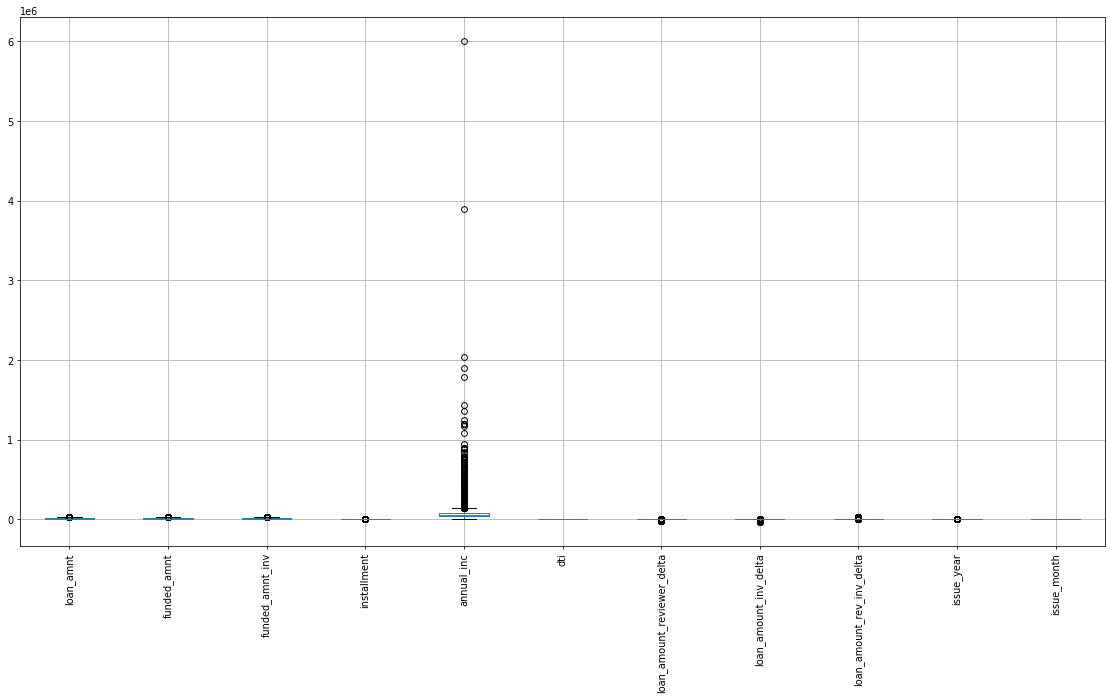

In [21]:
plt.figure(figsize=(20,10), dpi=70)
lending_sub.boxplot()
plt.xticks(rotation=90)
plt.show()

#####Analysis on **Employee Title**

In [22]:
lending_sub['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

#####Visualizing **Loan status** - we saw that the data is imbalance with **85%** of data being **Fully paid**

In [23]:
(lending_sub[lending_sub['loan_status'] == 'Fully Paid']['loan_status'].count()/lending_sub['loan_status'].count())*100

85.41358840760039

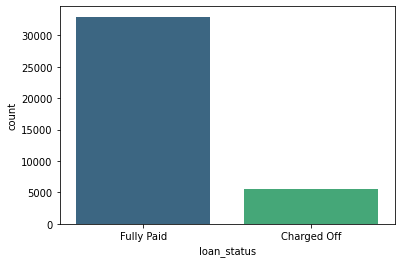

In [24]:
sns.countplot(x=lending_sub['loan_status'], data=lending_sub, palette='viridis')
plt.show()

#####Plot showing that maximum number of loan was issued in year 2011

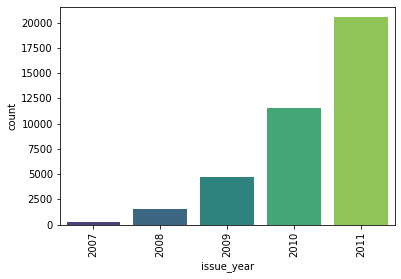

In [25]:
sns.countplot(x=lending_sub['issue_year'], data=lending_sub, palette='viridis')
plt.xticks(rotation=90);

Analysis on **Loan amount** feature

In [26]:
lending_sub['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

##### As per the analysis on loan status being Charged off on loan_amount we found 5 outlier.

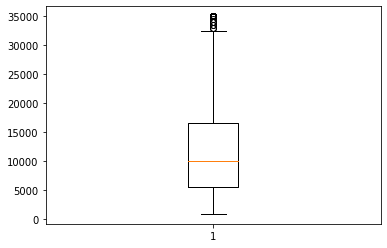

In [27]:
plt.boxplot(lending_sub[lending_sub['loan_status']== 'Charged Off']['loan_amnt'])
plt.show()

#####Binning on loan amount to have better interpretation of data

In [28]:
def loan_amt_group(i):
    if i <= 1000:
        return '<1000'
    elif i > 1000 and i <=5300:
        return '1000-5300'
    elif i > 5300 and i <=9600:
        return '5300-9600'
    elif i > 9600 and i <=15000:
        return '9600-15000'
    else:
        return '15000+'

lending_sub['loan_amnt_group'] = lending_sub['loan_amnt'].apply(lambda x: loan_amt_group(x))
lending_sub['loan_amnt_group'].value_counts()

9600-15000    10645
5300-9600      9648
1000-5300      9354
15000+         8620
<1000           310
Name: loan_amnt_group, dtype: int64

#####The plot shows that the maximum loan requested was from **9600-15000** followed by **5300-9600**

In [29]:
(lending_sub[lending_sub['loan_amnt_group']=='9600-15000']['loan_amnt_group'].count()/lending_sub['loan_amnt_group'].count())*100

27.594162324701248

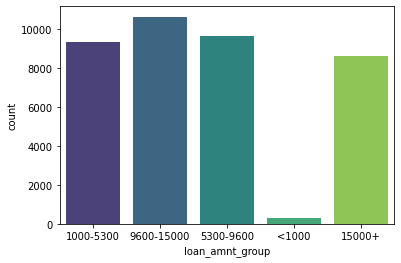

In [30]:
sns.countplot(x=lending_sub['loan_amnt_group'], data=lending_sub, palette='viridis')
plt.show()

#####Analysis on **Interest rate**

##### As per the analysis on loan status being Charged off on interest rate we found 2 outlier.

##### Creating groups for interest rate (binning) to understand which group consists of majority defaulter. This would be used in Bivariate analysis.



In [31]:
lending_sub['int_rate'] = lending_sub['int_rate'].str.strip('%').astype('float')
lending_sub['int_rate_bucket'] = pd.cut(lending_sub['int_rate'],[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
lending_sub['int_rate_bucket'].value_counts()

10-15    18265
5-10     12316
15-20     7226
20-25      770
0-5          0
25-30        0
Name: int_rate_bucket, dtype: int64

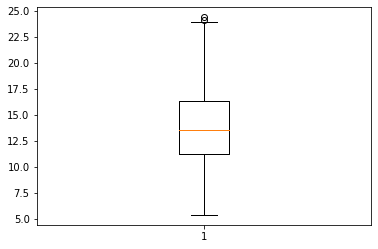

In [32]:
plt.boxplot(lending_sub[lending_sub['loan_status']== 'Charged Off']['int_rate'])
plt.show()

#####Analysis on **Term**

In [33]:
lending_sub['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

#####75% of loan requested was for 36 months tenure

In [34]:
(lending_sub[lending_sub['term']==' 36 months']['term'].count()/lending_sub['term'].count())*100


75.42317961479638

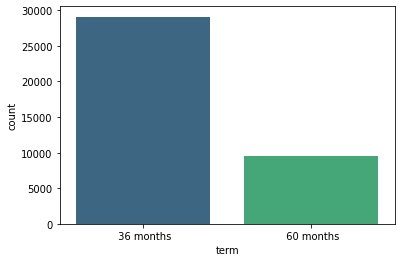

In [35]:
sns.countplot(x=lending_sub['term'], data=lending_sub, palette='viridis')
plt.show()

#####Analysis on **Installments**

In [36]:
lending_sub['installment'].value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
587.33     1
518.72     1
51.91      1
835.09     1
255.43     1
Name: installment, Length: 15022, dtype: int64

In [37]:
lending_sub['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [38]:
def install_group(i):
    if i <= 165.740000:
        return 'low'
    elif i > 165.740000 and i <=277.860000:
        return 'medium'
    elif i > 277.860000 and i <=425.550000:
        return 'high'
    else:
        return 'higher'

lending_sub['installment_group'] = lending_sub['installment'].apply(lambda x: install_group(x))
lending_sub['installment_group'].value_counts()

low       9662
high      9650
higher    9637
medium    9628
Name: installment_group, dtype: int64

#####Analysis on **Grades and sub Grades**

In [39]:
lending_sub['grade'].isnull().sum()

0

In [40]:
lending_sub['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [41]:
lending_sub['sub_grade'].isnull().sum()

0

In [42]:
lending_sub['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

Analysis on **Loan Status**

##### Replacing 'Fully Paid' to 0 and 'Charged Off' to 1 for better visualization

In [43]:
lending_sub['loan_status_val'] = lending_sub['loan_status'].replace('Fully Paid',0).replace('Charged Off',1)
lending_sub['loan_status_val'].value_counts()

0    32950
1     5627
Name: loan_status_val, dtype: int64

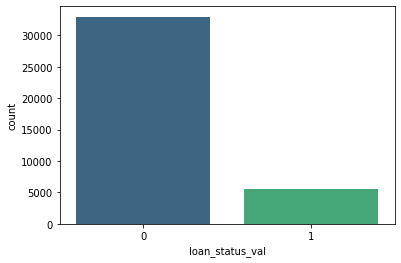

In [44]:
sns.countplot(x=lending_sub['loan_status_val'], data=lending_sub, palette='viridis')
plt.show()

##### Number of rows in emp_length column where we have null value with loan status as charged off

#####Analysis on **Employee Length**

##### Converting emp_length column to contain integer value

In [45]:
emp = {'< 1 year': 0,'1 year': 1, '2 years': 2,'3 years': 3, '4 years': 4,'5 years': 5, '6 years': 6,'7 years': 7,'8 years': 8,'9 years': 9,'10+ years': 10,  }

In [46]:
lending_sub = lending_sub.replace({"emp_length": emp})
lending_sub['emp_length'].value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

Null count of employee length where loan status is Charged off

In [47]:
lending_sub[(lending_sub['emp_length'].isna()) &(lending_sub['loan_status_val'] == 1)]['emp_length'].isna().sum()

228

##### Replacing null values with mode

In [48]:
lending_sub['emp_length'] = lending_sub['emp_length'].fillna(lending_sub['emp_length'].mode()[0])
lending_sub['emp_length'].value_counts()

10.0    9521
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

##### Plot shows 10 + years of experience have taken maximum loan.

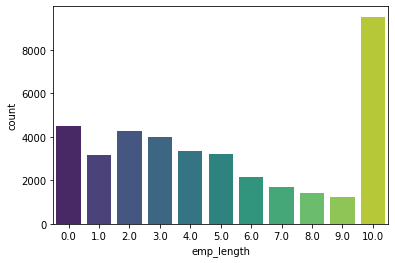

In [49]:
sns.countplot(x=lending_sub['emp_length'], data=lending_sub, palette='viridis')
plt.show()

Analysis on **Funded amount, Funded Investor amount and Loan amount** - Based on analysis we found that Investor funded amount (Investor) never exceeded Funded amount (Reviewer)

Check if Reviewer has paid more than requesed loan amount

In [50]:
lending_sub[lending_sub['loan_amount_reviewer_delta'] > 0]['loan_amount_reviewer_delta'].count()

0

Check if Invester has paid more than requesed loan amount

In [51]:
lending_sub[lending_sub['loan_amount_inv_delta'] > 0]['loan_amount_inv_delta'].count()

0

Number of entries where reviewer amount is accepted by investor



In [52]:
lending_sub[lending_sub['loan_amount_rev_inv_delta'] == 0]['loan_amount_rev_inv_delta'].count()

19347

Number of entries where reviewer amount is accepted by invester and loan status in "charged off"

In [53]:
(lending_sub[(lending_sub['loan_amount_rev_inv_delta'] == 0)&(lending_sub['loan_status'] == "Charged Off")]['loan_amount_rev_inv_delta'].count()/lending_sub[lending_sub['loan_amount_rev_inv_delta'] == 0]['loan_amount_rev_inv_delta'].count())*100

14.265777639944178

#####Analysis on **Home ownership**

In [54]:
lending_sub['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

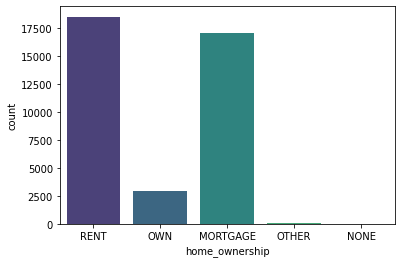

In [55]:
sns.countplot(x=lending_sub['home_ownership'], data=lending_sub, palette='viridis')
plt.show()

#####Analysis on **Annual income**

In [56]:
lending_sub['annual_inc'].value_counts()

60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
80569.0        1
82116.0        1
242400.0       1
133300.0       1
27376.0        1
Name: annual_inc, Length: 5215, dtype: int64

In [57]:
lending_sub['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

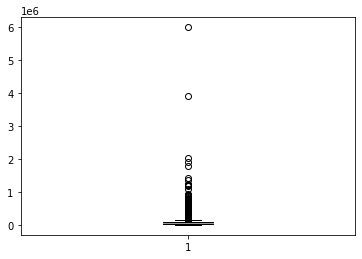

In [58]:
plt.boxplot(lending_sub['annual_inc'])
plt.show()

#####We can see that there are 1762 records which are outliers

In [59]:
q1 = lending_sub['annual_inc'].quantile(0.25)
q3 = lending_sub['annual_inc'].quantile(0.75)
IQR = q3 - q1
outl1 = q3 + (1.5*IQR)
outl2 = q1 - (1.5*IQR)

In [60]:
lending_sub[lending_sub['annual_inc'] > outl1]['annual_inc'].count()

1762

In [61]:
lending_sub[lending_sub['annual_inc'] < outl2]['annual_inc'].count()

0

###### Disitirbution of Annual income - this shows that the salary distribution is skewed towards right

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


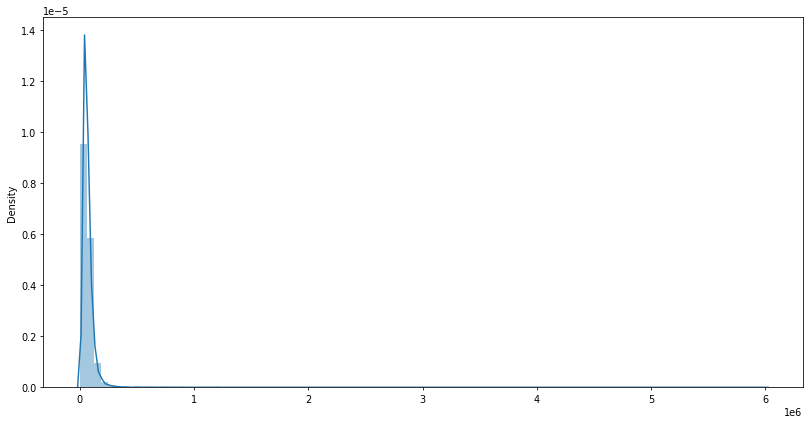

In [62]:
plt.figure(figsize=(14,7), dpi=70)
sns.distplot(x=lending_sub['annual_inc'], bins=100)
plt.show()

#####Creating buckets on the annual income

In [63]:
def annual_group(i):
    if i <= 50000:
        return 'low_inc'
    elif i > 50000 and i <=100000:
        return 'medium_inc'
    elif i > 100000 and i <=150000:
        return 'high_inc'
    else:
        return 'higher_inc'

lending_sub['annual_inc_group'] = lending_sub['annual_inc'].apply(lambda x: annual_group(x))
lending_sub['annual_inc_group'].value_counts()

medium_inc    17707
low_inc       15389
high_inc       3995
higher_inc     1486
Name: annual_inc_group, dtype: int64

##### Plot shows that medium income group [100000 - 150000] are the majority of the distribution 

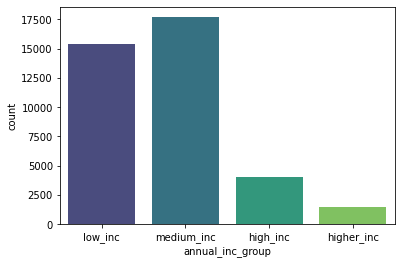

In [64]:
sns.countplot(x=lending_sub['annual_inc_group'], data=lending_sub, palette='viridis')
plt.show()

#####Analysis on **Verification_status**

Applying info method on the dataframe to verify the columns and its dtype

In [65]:
lending_sub['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

#####Plot shows that majority as not verified

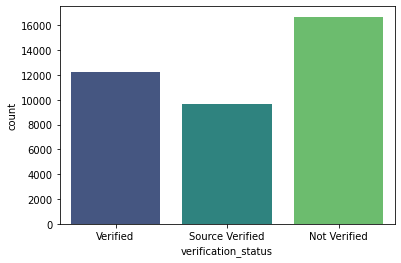

In [66]:
sns.countplot(x=lending_sub['verification_status'], data=lending_sub, palette='viridis')
plt.show()

#####Analysis on **Purpose** - Plot shows that maximum loan is for debt consolidation

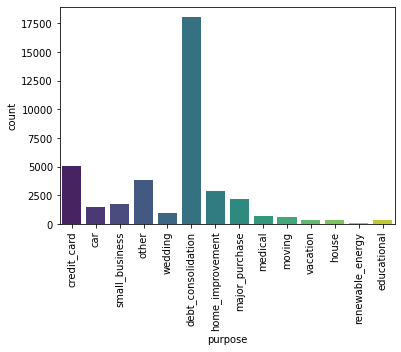

In [67]:
sns.countplot(x=lending_sub['purpose'], data=lending_sub, palette='viridis')
plt.xticks(rotation=90)
plt.show()

Analysis on **Zip code**

In [68]:
lending_sub['zip_code'].value_counts()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64

In [69]:
lending_sub['zip_code'] = lending_sub['zip_code'].str.replace('xx','')

In [70]:
lending_sub['zip_code'].value_counts()

100    583
945    531
112    502
606    493
070    455
      ... 
463      1
381      1
592      1
414      1
469      1
Name: zip_code, Length: 822, dtype: int64

#####Analysis on **Address State**

In [71]:
lending_sub['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

#####Visualization depicts that California (CA) region has maximum loan entries

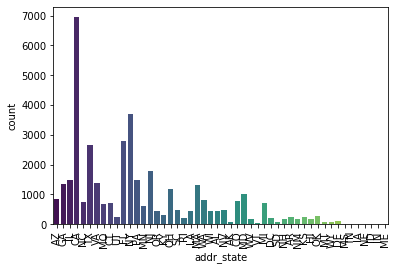

In [72]:
sns.countplot(x=lending_sub['addr_state'], data=lending_sub, palette='viridis')
plt.xticks(rotation=90)
plt.show()

#####Analysis on **DTI**

In [73]:
lending_sub['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [74]:
lending_sub[lending_sub['dti']<1]['dti'].value_counts()

0.00    178
0.60     20
0.50     17
0.72     16
0.25     15
       ... 
0.09      2
0.03      2
0.12      2
0.19      1
0.06      1
Name: dti, Length: 99, dtype: int64

In [75]:
lending_sub['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

##### Creating group based on the quartile.

In [76]:
def dti_group(i):
    if i <= 13.370000:
        return 'group1'
    elif i > 13.370000 and i <=18.560000:
        return 'group2'
    else:
        return 'group3'

lending_sub['dti_group'] = lending_sub['dti'].apply(lambda x: dti_group(x))
lending_sub['dti_group'].value_counts()

group1    19300
group2     9650
group3     9627
Name: dti_group, dtype: int64

##### Group1 with dti less than 13.37 has the most loan.

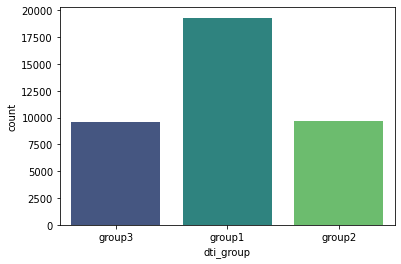

In [77]:
sns.countplot(x=lending_sub['dti_group'], data=lending_sub, palette='viridis')
plt.show()

In [78]:
lending_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   38577 non-null  int64         
 1   funded_amnt                 38577 non-null  int64         
 2   funded_amnt_inv             38577 non-null  float64       
 3   term                        38577 non-null  object        
 4   int_rate                    38577 non-null  float64       
 5   installment                 38577 non-null  float64       
 6   grade                       38577 non-null  object        
 7   sub_grade                   38577 non-null  object        
 8   emp_title                   36191 non-null  object        
 9   emp_length                  38577 non-null  float64       
 10  home_ownership              38577 non-null  object        
 11  annual_inc                  38577 non-null  float64   

####**Segmented Univariate and Bivariate Analysis**

#####Correlation between the features - it can be seen that the amount fields are highly correlated with installment

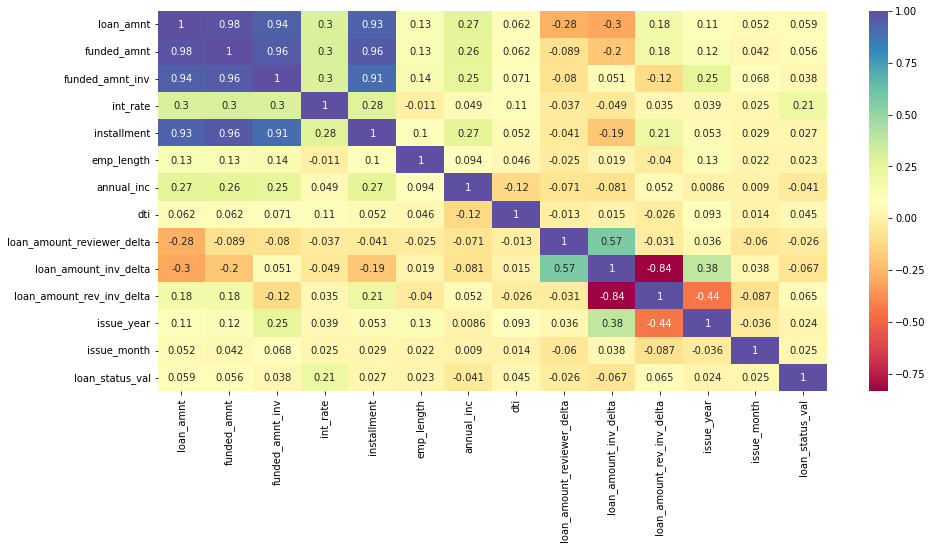

In [79]:
plt.figure(figsize= (15,7))
sns.heatmap(lending_sub.corr(), annot=True, cmap="Spectral")
plt.show()

#####Comparing **int_rate with loan_status**

#####Interest group in the range of **20-25** has more that **35% defaulter**

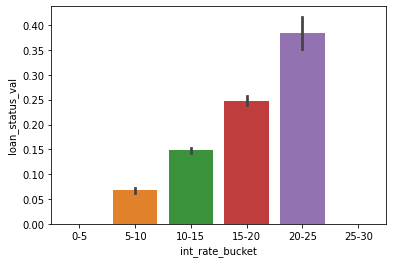

In [80]:
sns.barplot(x='int_rate_bucket', y='loan_status_val', data=lending_sub)
plt.show()

In [81]:
pd.crosstab(lending_sub['int_rate_bucket'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
int_rate_bucket,,,
5-10,830,11486,12316
10-15,2707,15558,18265
15-20,1794,5432,7226
20-25,296,474,770
Grand_Total,5627,32950,38577


#####Comparing **emp_length with loan_status**

#####Emp with tenure more than 10 year consists of **16% defaulter** 

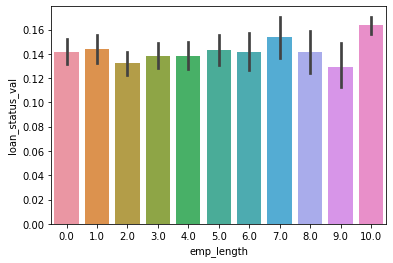

In [82]:
sns.barplot(x='emp_length', y='loan_status_val', data=lending_sub)
plt.show()

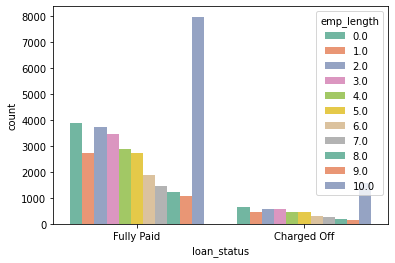

In [83]:
sns.countplot(x="loan_status", hue="emp_length", data=lending_sub,palette="Set2")
sns.set(rc={'figure.figsize':(20,10)})

In [84]:
pd.crosstab(lending_sub['emp_length'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
emp_length,,,
0.0,639,3869,4508
1.0,456,2713,3169
2.0,567,3724,4291
3.0,555,3457,4012
4.0,462,2880,3342
5.0,458,2736,3194
6.0,307,1861,2168
7.0,263,1448,1711
8.0,203,1232,1435


#####Comparing **annual_inc with loan_status**

#####Annual inc less than 50000 consists of **20.4% defaulter** 

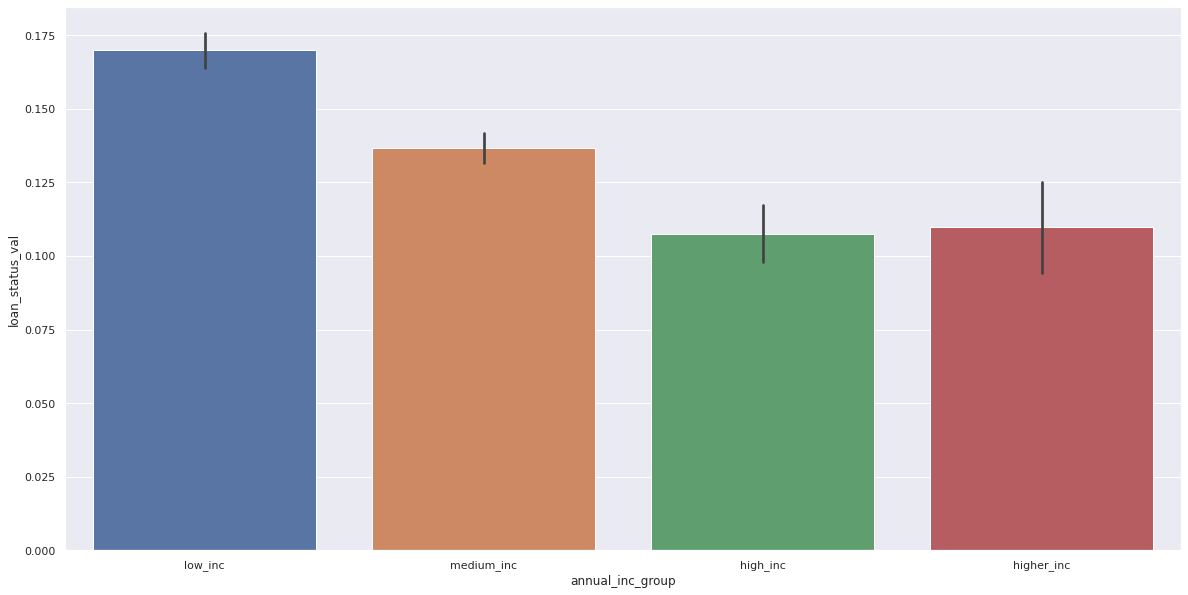

In [85]:
sns.barplot(x='annual_inc_group', y='loan_status_val', data=lending_sub)
plt.show()

In [86]:
pd.crosstab(lending_sub['annual_inc_group'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
annual_inc_group,,,
high_inc,429,3566,3995
higher_inc,163,1323,1486
low_inc,2613,12776,15389
medium_inc,2422,15285,17707
Grand_Total,5627,32950,38577


#####Comparing **purpose with loan_status**

#####Purpose of loan with small business consists of **27% defaulter** 

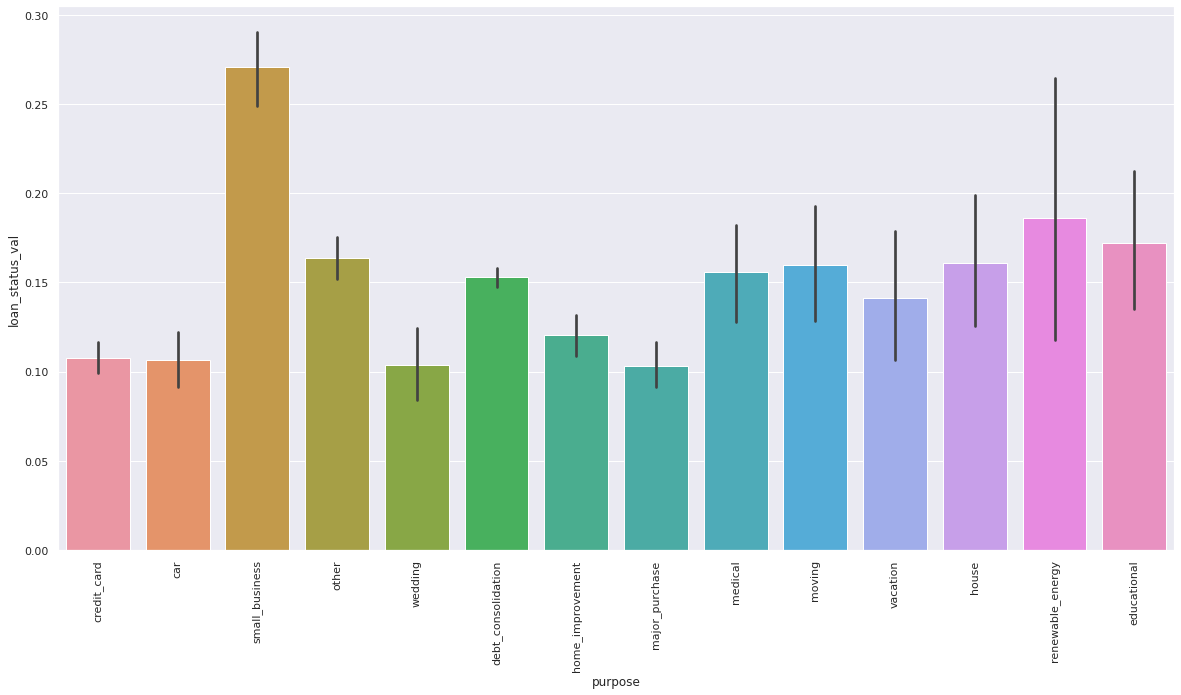

In [87]:
sns.barplot(x='purpose', y='loan_status_val',  data=lending_sub)
plt.xticks(rotation=90);

In [88]:
pd.crosstab(lending_sub['purpose'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
purpose,,,
car,160,1339,1499
credit_card,542,4485,5027
debt_consolidation,2767,15288,18055
educational,56,269,325
home_improvement,347,2528,2875
house,59,308,367
major_purchase,222,1928,2150
medical,106,575,681
moving,92,484,576


#####Comparing **dti with loan_status**

#####Dti more than 18.56  consists of **17% defaulter** 

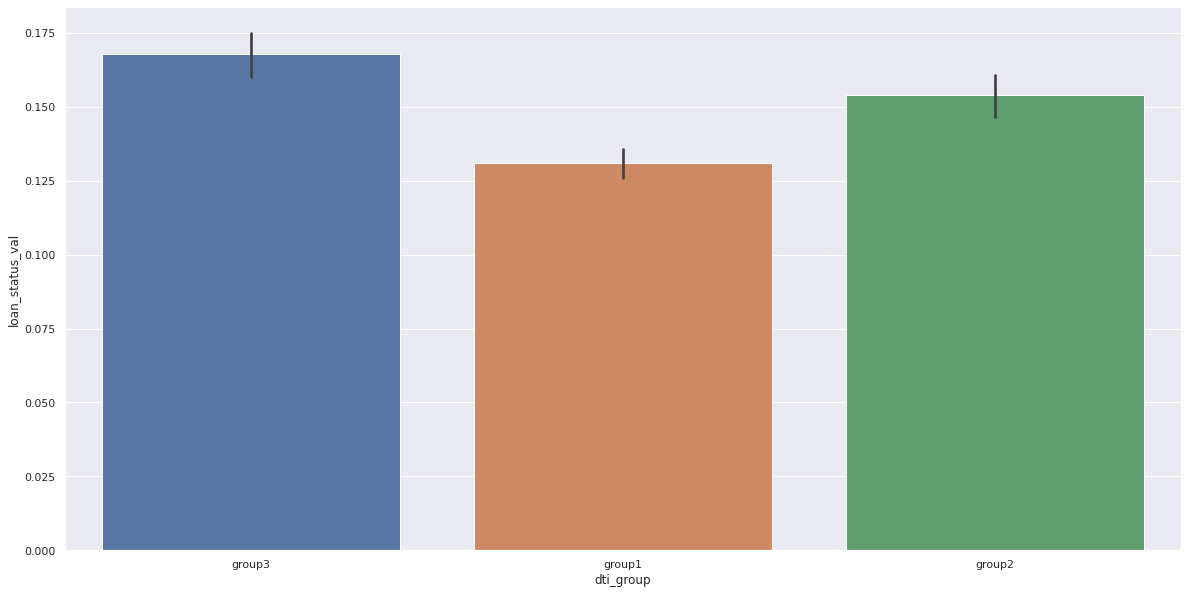

In [89]:
sns.barplot(x='dti_group', y='loan_status_val', data=lending_sub)
plt.show()

In [90]:
pd.crosstab(lending_sub['dti_group'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
dti_group,,,
group1,2526,16774,19300
group2,1485,8165,9650
group3,1616,8011,9627
Grand_Total,5627,32950,38577


#####Comparing **Home_ownership with loan_status**

#####Home_ownership as other consists of **18.3% defaulter** 

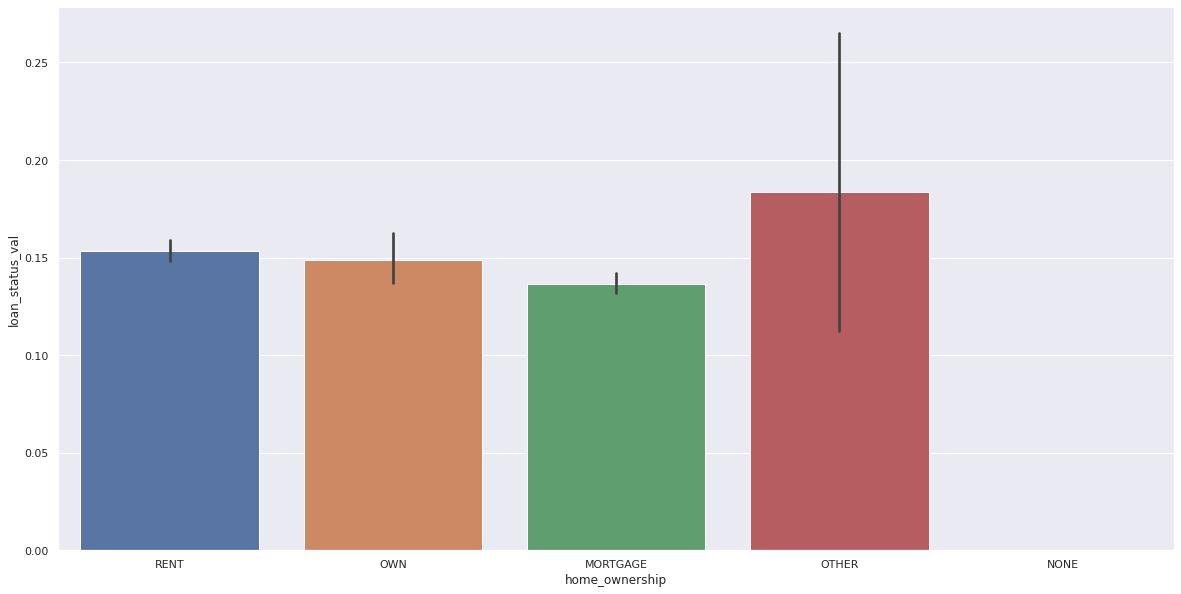

In [91]:
sns.barplot(x='home_ownership', y='loan_status_val', data=lending_sub)
plt.show()

In [92]:
pd.crosstab(lending_sub['home_ownership'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
home_ownership,,,
MORTGAGE,2327,14694,17021
NONE,0,3,3
OTHER,18,80,98
OWN,443,2532,2975
RENT,2839,15641,18480
Grand_Total,5627,32950,38577


#####Comparing **verification_status with loan_status**

#####Verification_status == **Verified** consists of **16% defaulter** 




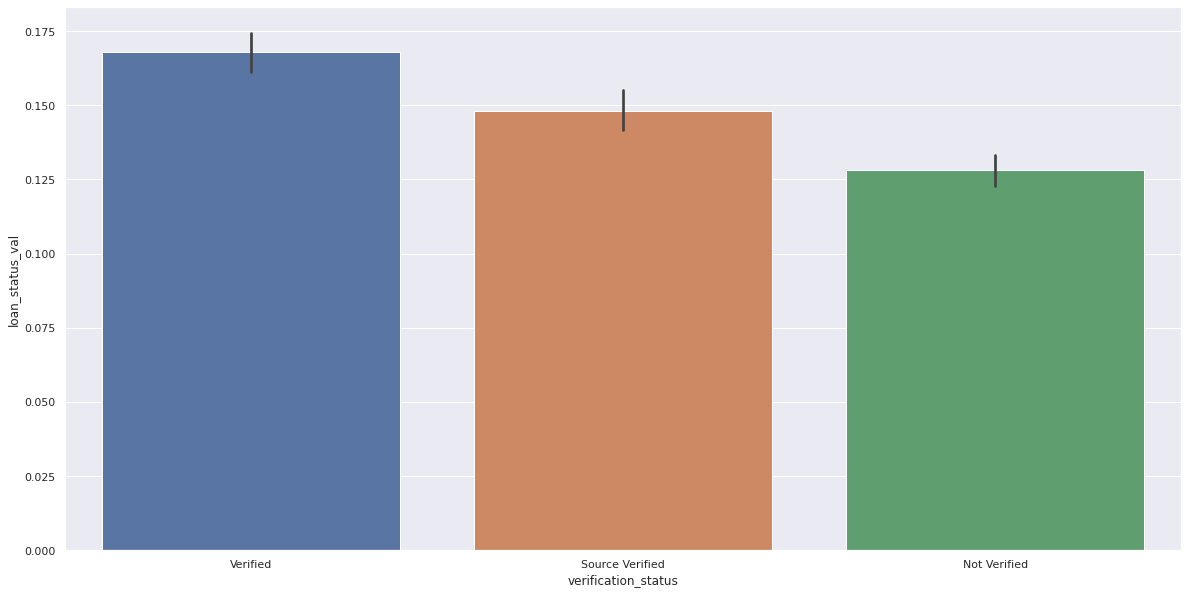

In [93]:
sns.barplot(x='verification_status', y='loan_status_val', data=lending_sub)
plt.show()

In [94]:
pd.crosstab(lending_sub['verification_status'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
verification_status,,,
Not Verified,2142,14552,16694
Source Verified,1434,8243,9677
Verified,2051,10155,12206
Grand_Total,5627,32950,38577


In [95]:
#sns.pairplot(lending_sub)

#####Comparing **grade with loan_status**

#####Grade == **G** consists of majority **% defaulter** followed by **F**




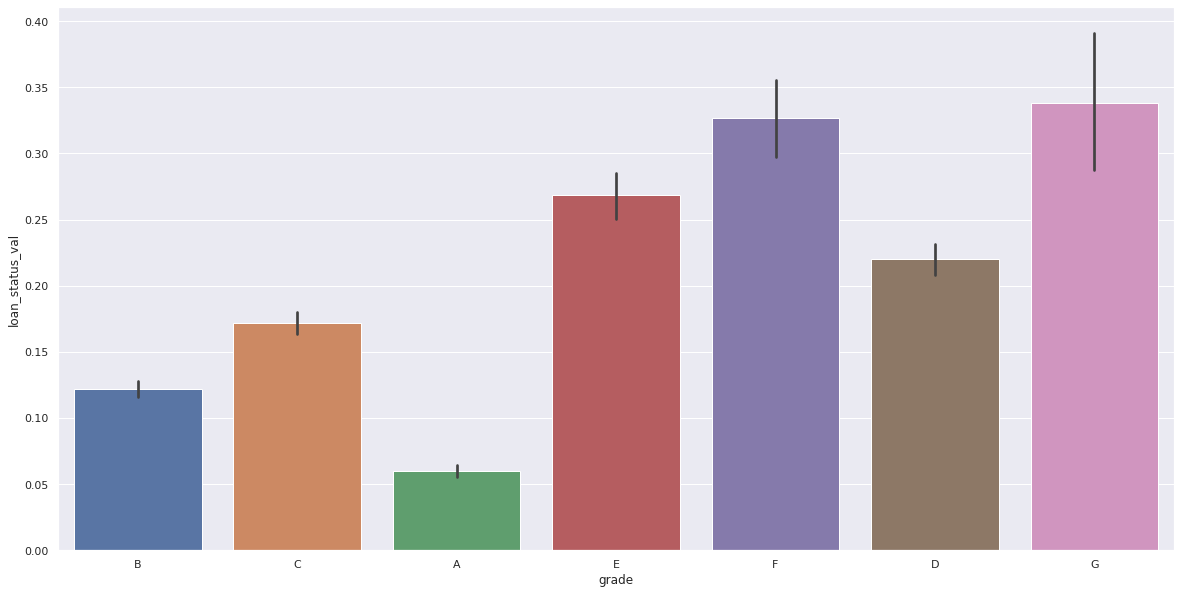

In [96]:
sns.barplot(x='grade', y='loan_status_val', data=lending_sub)
plt.show()

In [97]:
pd.crosstab(lending_sub['grade'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
grade,,,
A,602,9443,10045
B,1425,10250,11675
C,1347,6487,7834
D,1118,3967,5085
E,715,1948,2663
F,319,657,976
G,101,198,299
Grand_Total,5627,32950,38577


#####Comparing **Term with loan_status**


#####Term with 60 Months with respect to the total contribution has **25%** more defaulter

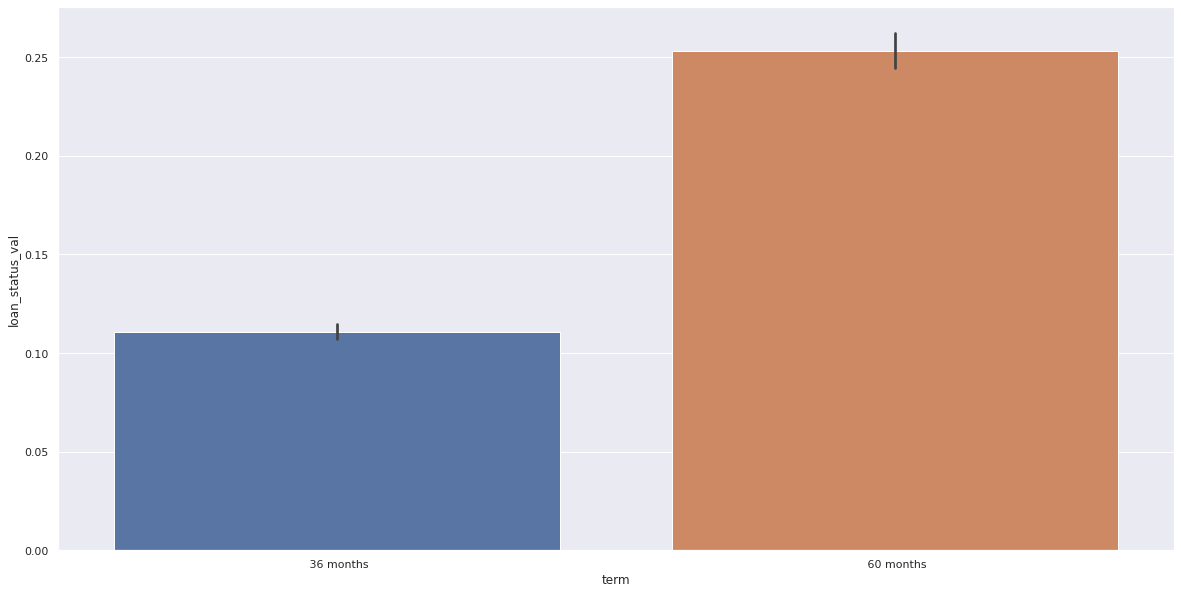

In [98]:
sns.barplot(x='term', y='loan_status_val', data=lending_sub)
plt.show()

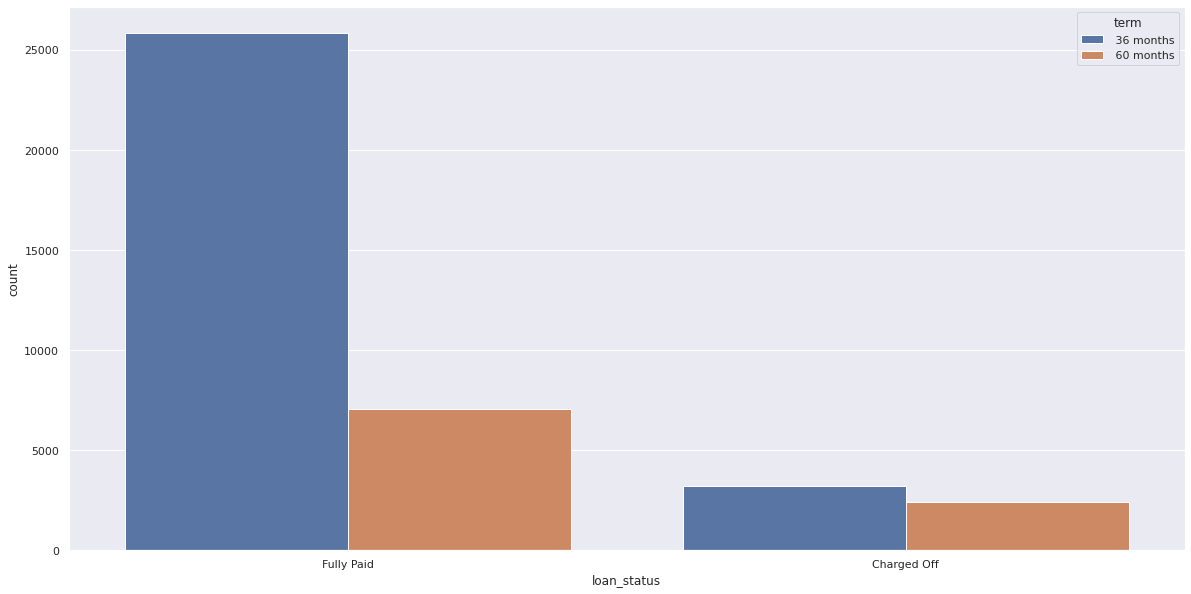

In [99]:
sns.countplot(x="loan_status", hue="term", data=lending_sub)
plt.show()

In [100]:
pd.crosstab(lending_sub['term'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
term,,,
36 months,3227,25869,29096
60 months,2400,7081,9481
Grand_Total,5627,32950,38577


#####Comparing **Issue Year with loan_status**


#####From the issue year we see that **2011 has the maximum defaulter in numbers** but if we compare it with Fully paid we can say that **2007 has highest default ratio**.

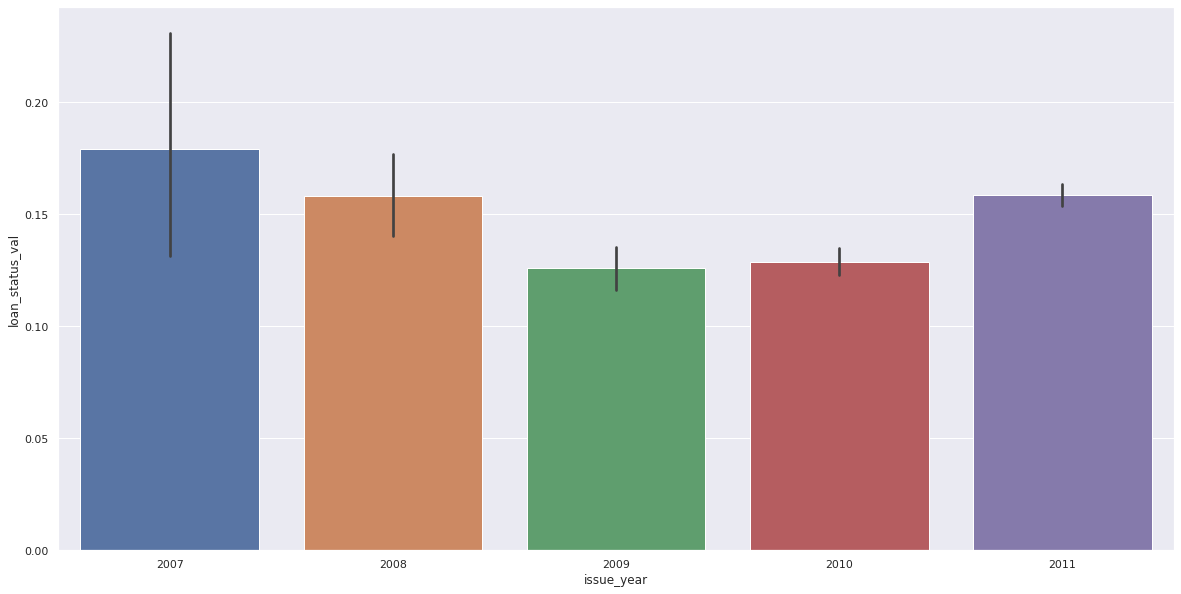

In [101]:
sns.barplot(x='issue_year', y='loan_status_val', data=lending_sub)
plt.show()

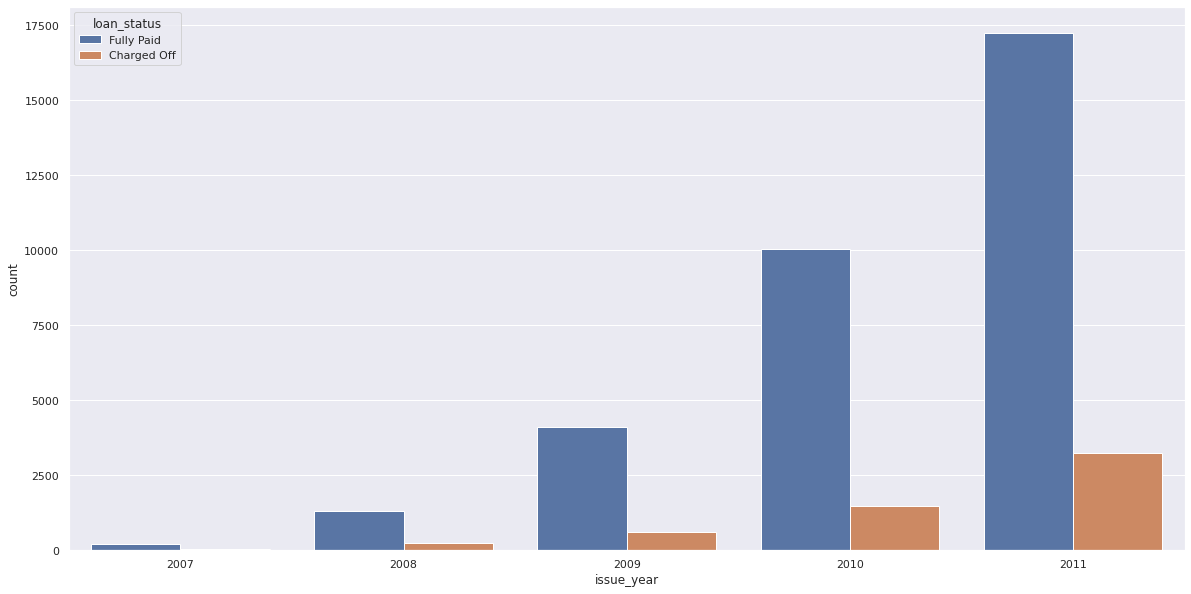

In [102]:
sns.countplot(x="issue_year", hue="loan_status", data=lending_sub)
plt.show()

In [103]:
pd.crosstab(lending_sub['issue_year'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
issue_year,,,
2007,45,206,251
2008,247,1315,1562
2009,594,4122,4716
2010,1485,10047,11532
2011,3256,17260,20516
Grand_Total,5627,32950,38577


#####Comparing **Address_state with loan_status**


#####As per the plot we see that **California has the maximum defaulter in numbers** but if we compare it with Fully paid we can say that **Nebraska has highest default ratio**.

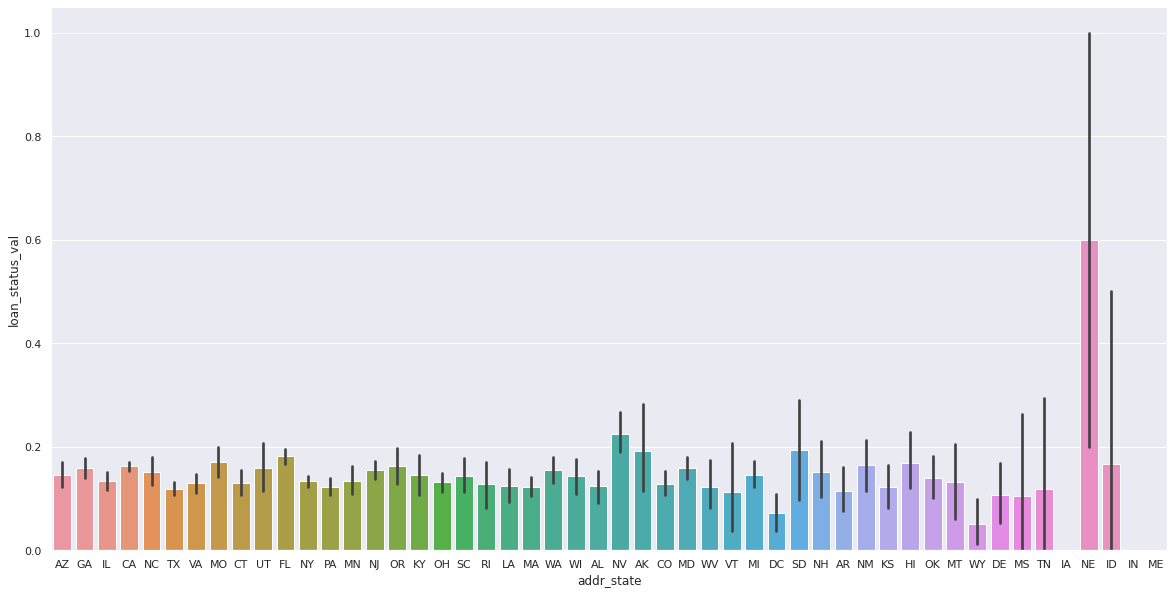

In [104]:
sns.barplot(x='addr_state', y='loan_status_val', data=lending_sub)
plt.show()

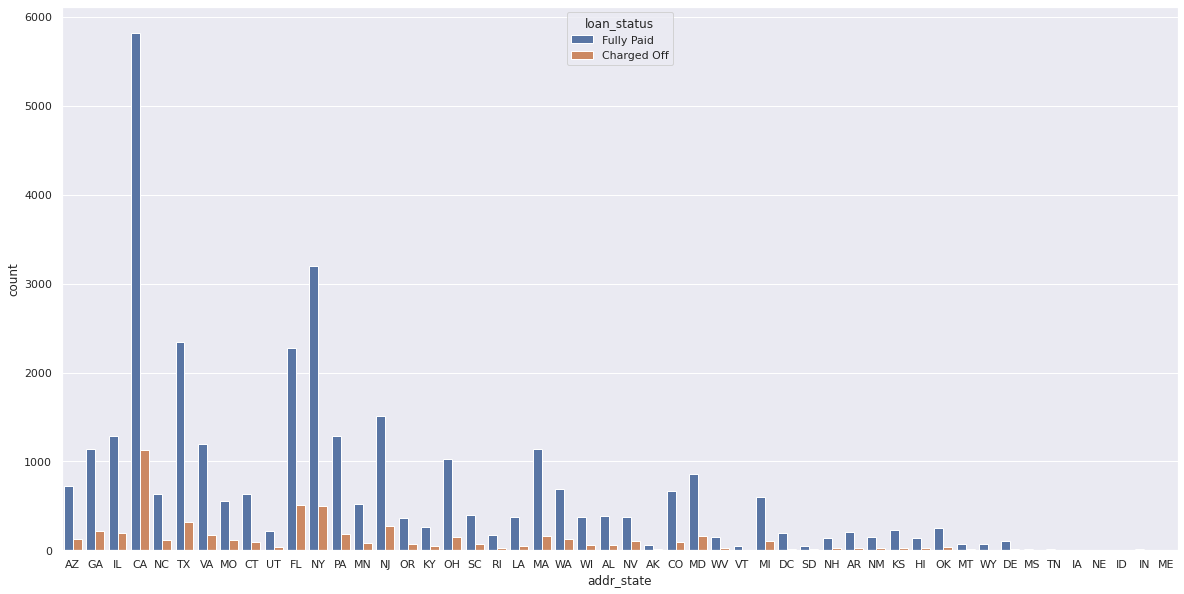

In [105]:
sns.countplot(x="addr_state", hue="loan_status", data=lending_sub)
plt.show()

In [106]:
pd.crosstab(lending_sub['addr_state'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
addr_state,,,
AK,15,63,78
AL,54,381,435
AR,27,208,235
AZ,123,726,849
CA,1125,5824,6949
CO,98,668,766
CT,94,632,726
DC,15,196,211
DE,12,101,113


#####Comparing **Loan_amount with loan_status**


#####As per the plot we can conclude that if loan amount is greater than 15000 then it has higher possibility of not repaying the loan.

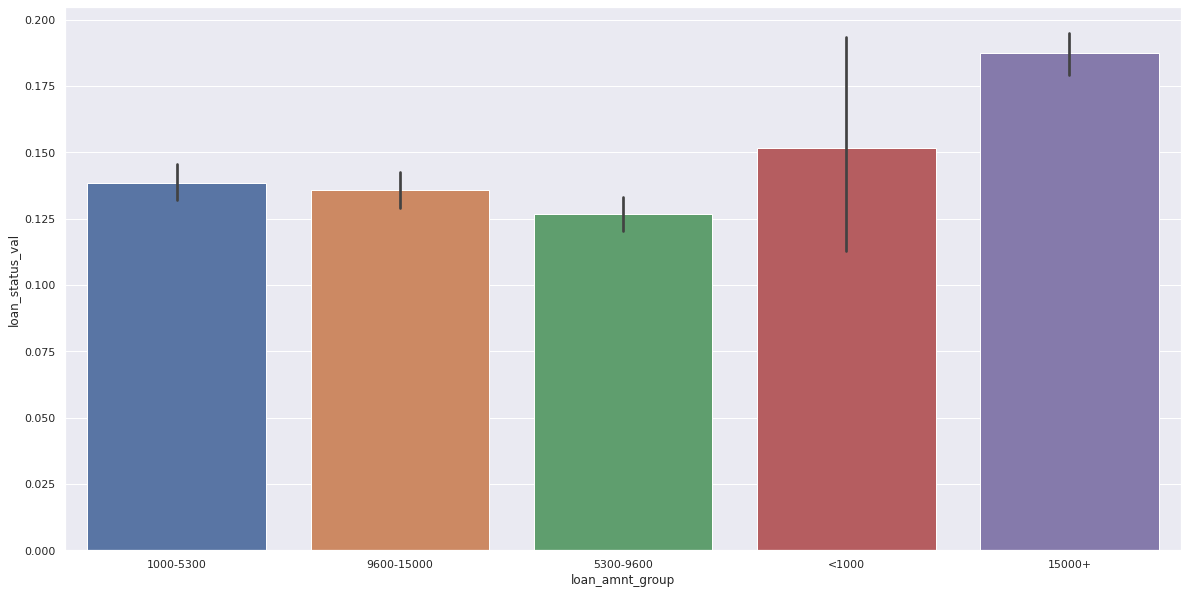

In [107]:
sns.barplot(x='loan_amnt_group', y='loan_status_val', data=lending_sub)
plt.show()

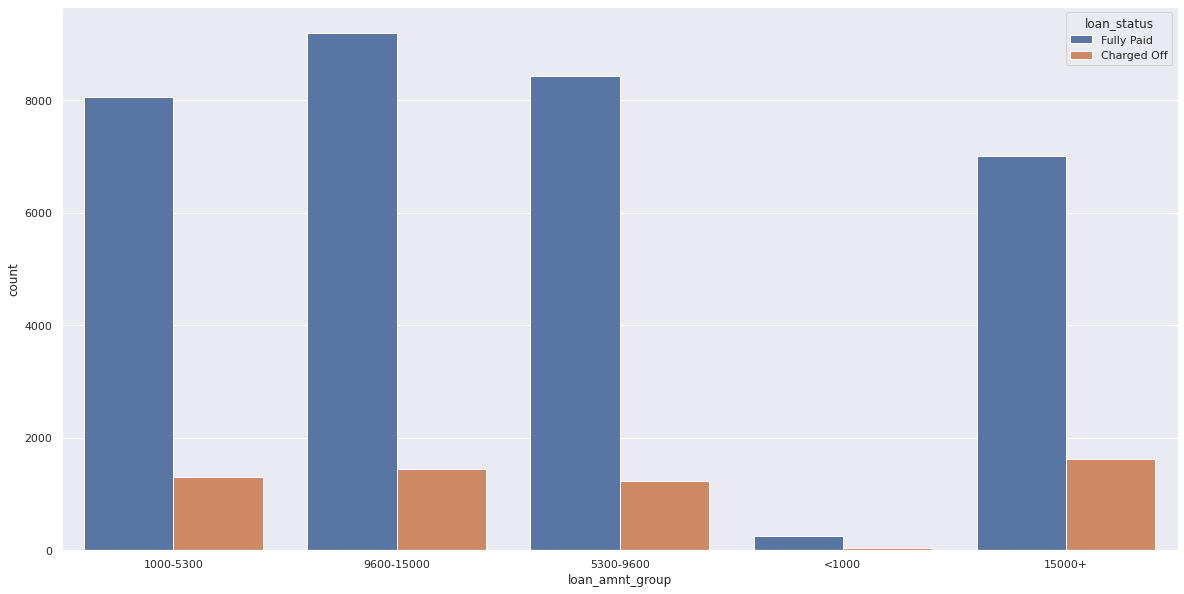

In [108]:
sns.countplot(x="loan_amnt_group", hue="loan_status", data=lending_sub)
plt.show()

In [109]:
pd.crosstab(lending_sub['loan_amnt_group'], lending_sub['loan_status'], margins=True, margins_name="Grand_Total")

loan_status,Charged Off,Fully Paid,Grand_Total
loan_amnt_group,,,
1000-5300,1295,8059,9354
15000+,1616,7004,8620
5300-9600,1224,8424,9648
9600-15000,1445,9200,10645
<1000,47,263,310
Grand_Total,5627,32950,38577


#####Comparison between **Employee length, Loan Status and Term** - We have observed that employee with 10+ years of experience and with term period 60 months with higher defaulter ratio. And in terms of number, we observed that 10+ years with 36 months are more in defaulters.

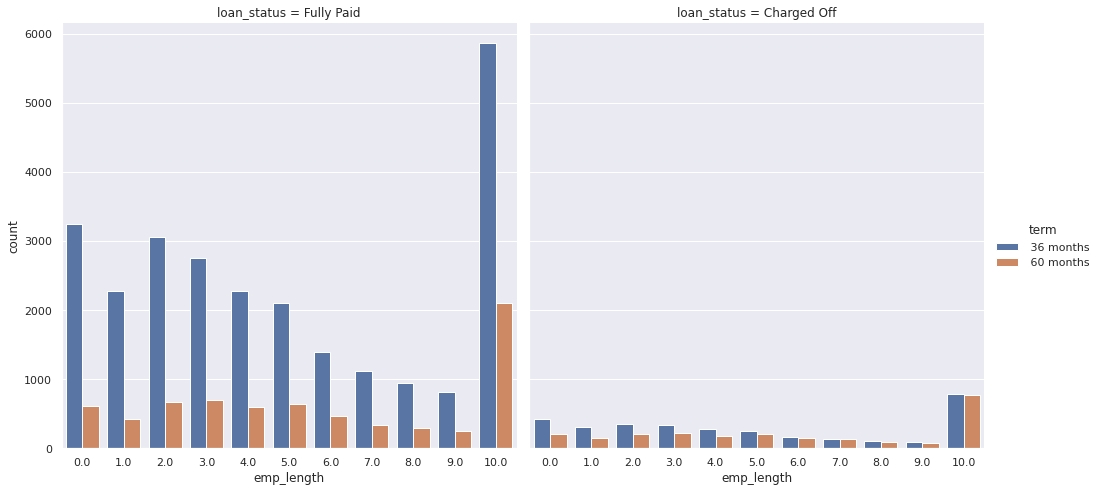

In [129]:
sns.catplot(x="emp_length", hue="term", col="loan_status",
                data=lending_sub, kind="count",
                height=7, aspect=1);

Comparison between **Loan status, Purpose and Term** - It is observed that maximum defaulters are those who have taken loan for Educational purpose with 60 months as term. And for small Business, we observe that irrespective of term the defaulter percentage is high.

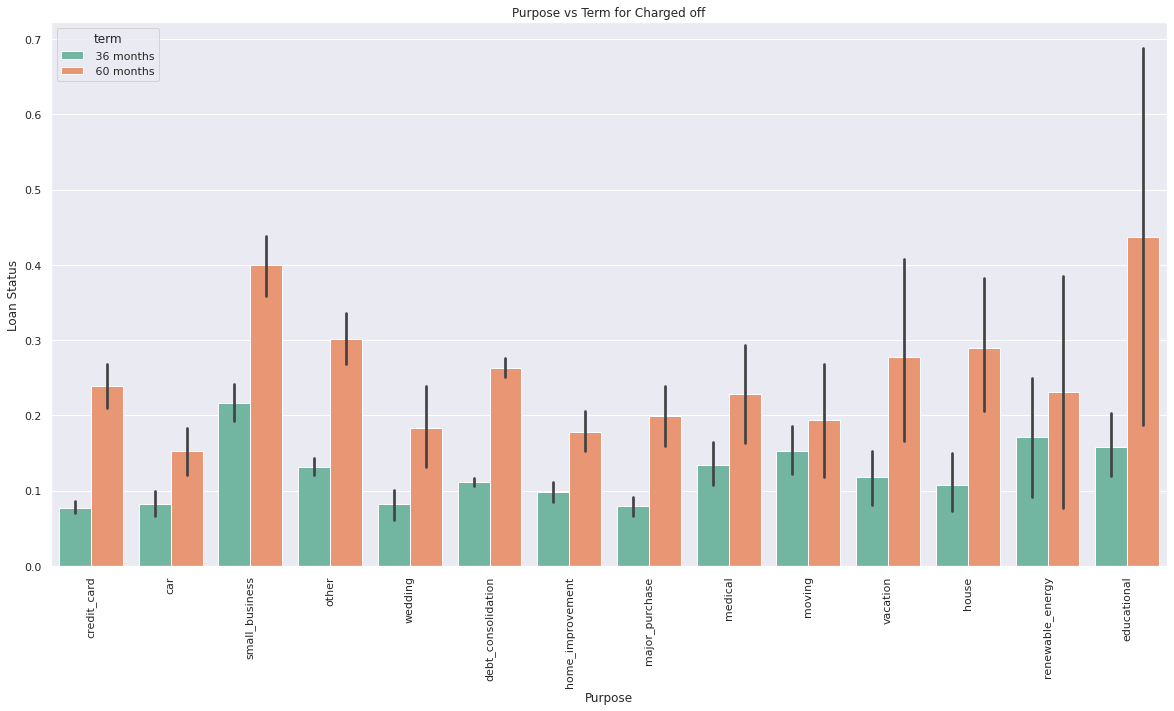

In [111]:
sns.barplot(x='purpose', y='loan_status_val', hue="term", data=lending_sub,palette="Set2")
plt.xticks(rotation=90)
plt.title('Purpose vs Term for Charged off')
plt.xlabel('Purpose')
plt.ylabel('Loan Status')
plt.show()

Comparison between **Loan status, Loan amount and Interest Rate** - It is observed that maximum defaulters are those who have taken loan with interest rate between **20-25** and for the analysis we can say that if the loan amount exceeds 15000, then the chances to pay the loan is low.

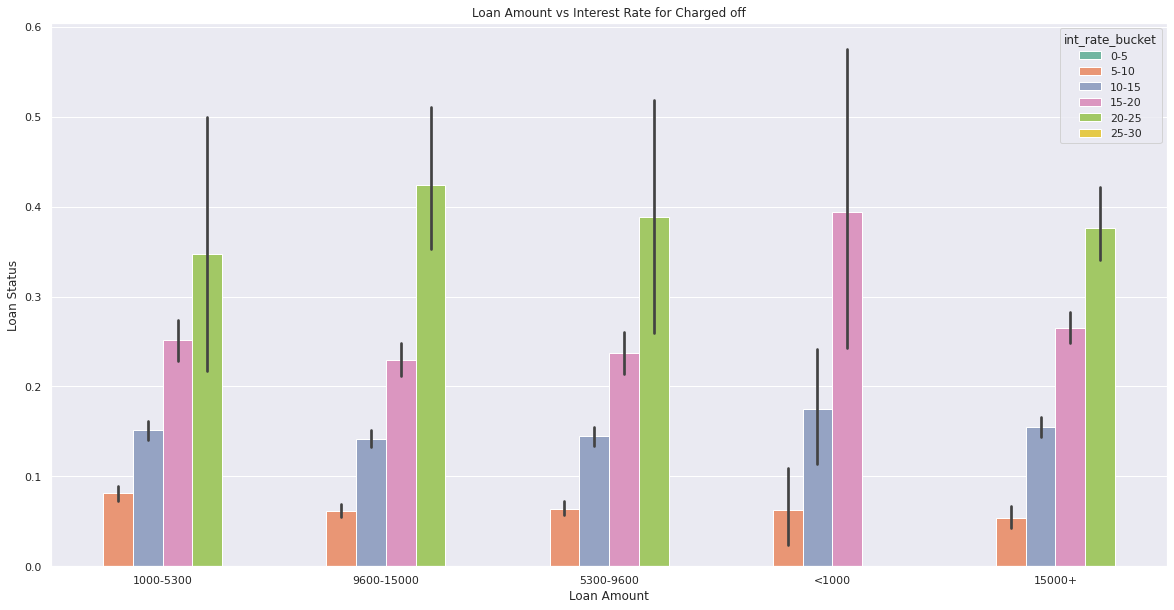

In [112]:
sns.barplot(x='loan_amnt_group', y='loan_status_val', hue="int_rate_bucket", data=lending_sub,palette="Set2")
plt.title('Loan Amount vs Interest Rate for Charged off')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.show()

#####Comparison between **Loan status, annual income and Installment** - It is observed that maximum defaulters are those who have taken loan with lower annual income irrespective of installment value.

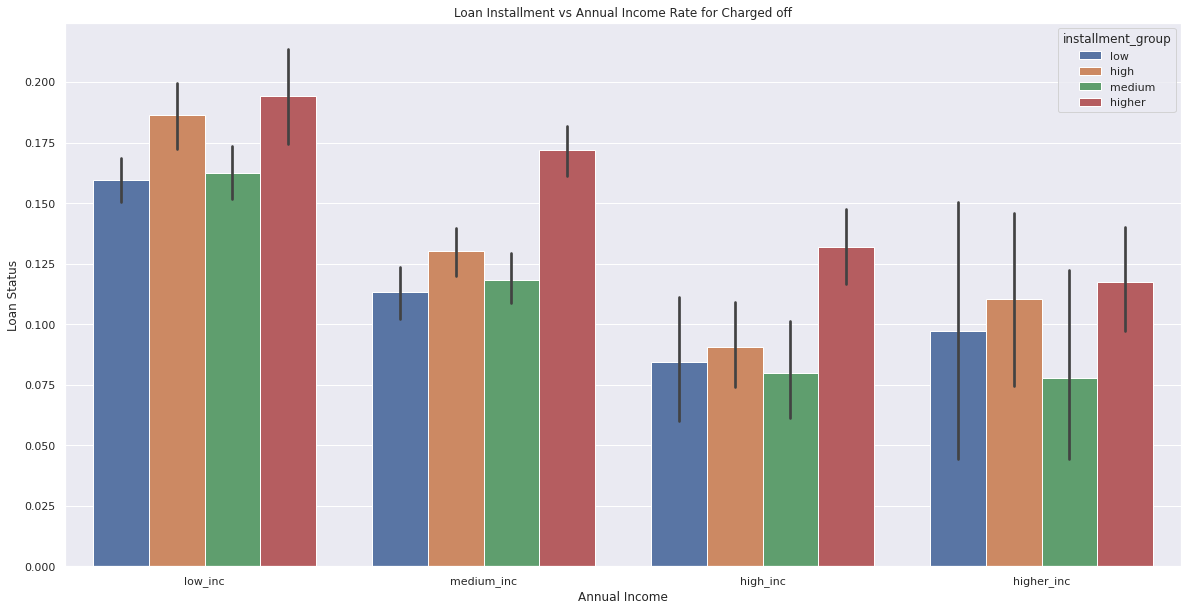

In [113]:
sns.barplot(x='annual_inc_group', y='loan_status_val', hue="installment_group", data=lending_sub)
plt.title('Loan Installment vs Annual Income Rate for Charged off')
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.show();

#####Comparison between **Loan status, Purpose and Grade** - It is observed that maximum defaulters are those who have taken loan with Grade G 

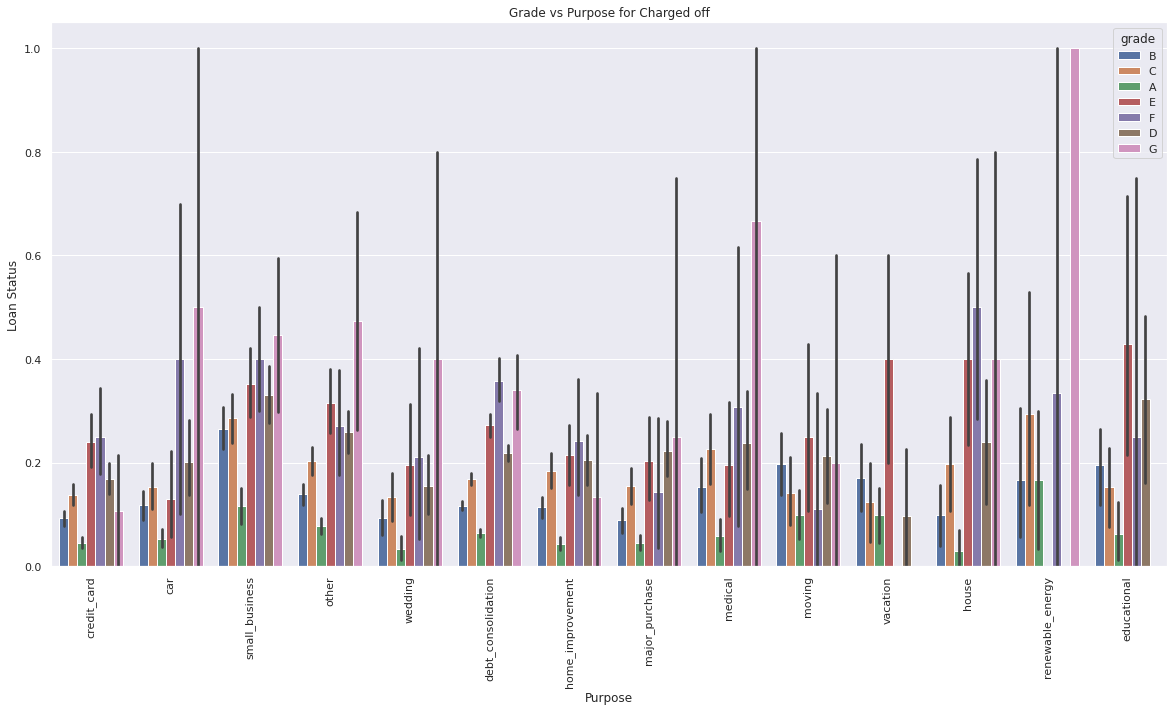

In [114]:
sns.barplot(x='purpose', y='loan_status_val', hue="grade", data=lending_sub)
plt.title('Grade vs Purpose for Charged off')
plt.xlabel('Purpose')
plt.ylabel('Loan Status')
plt.xticks(rotation=90)
plt.show();

#####Comparison between **Loan status, Home ownership and Annual income** - It is observed that maximum defaulters are those who have rented properties

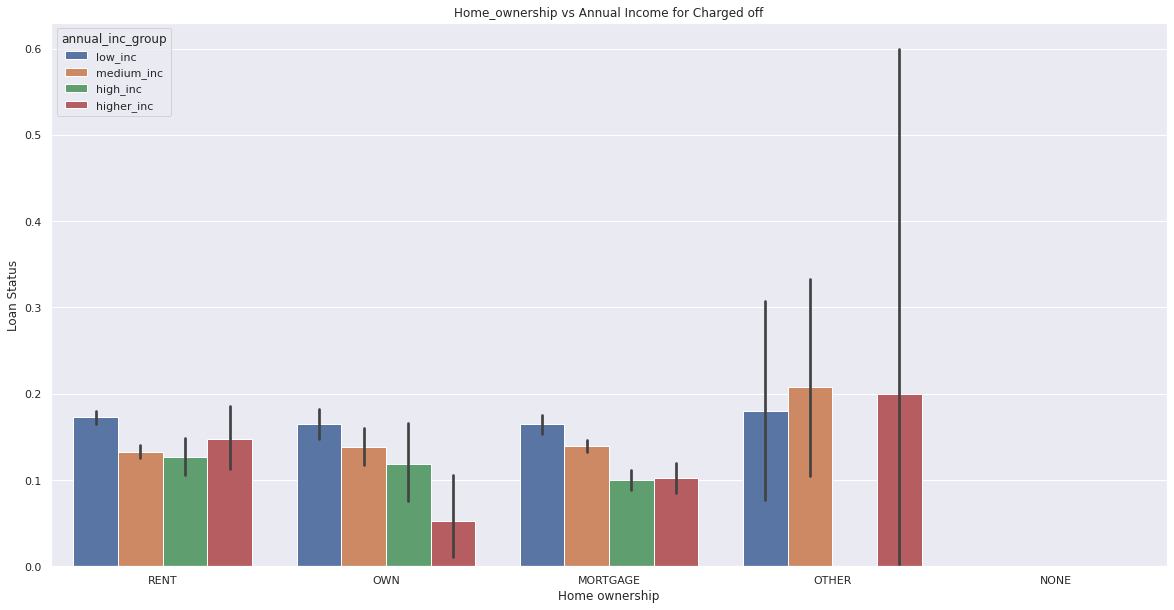

In [115]:
sns.barplot(x='home_ownership', y='loan_status_val', hue="annual_inc_group", data=lending_sub)
plt.title('Home_ownership vs Annual Income for Charged off')
plt.xlabel('Home ownership')
plt.ylabel('Loan Status')
plt.show();

#####Comparison between **Loan status, Verification status and Annual income** - It is observed that maximum defaulters are those who are in low income group

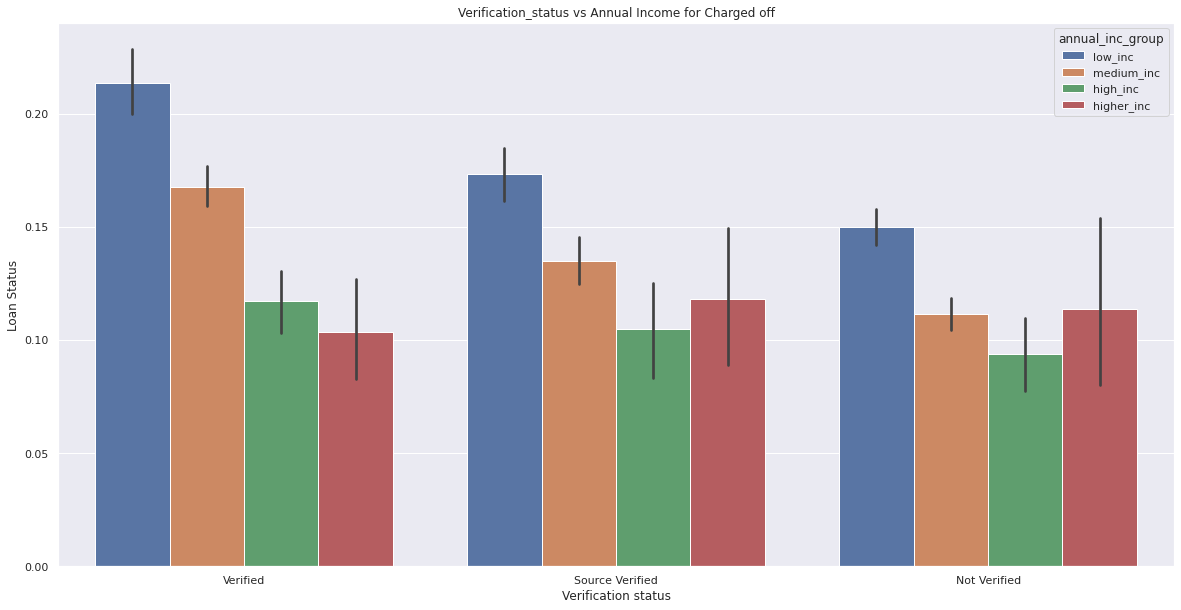

In [116]:
sns.barplot(x='verification_status', y='loan_status_val', hue="annual_inc_group", data=lending_sub)
plt.title('Verification_status vs Annual Income for Charged off')
plt.xlabel('Verification status')
plt.ylabel('Loan Status')
plt.show();

#####Comparison between **Loan Status, Verification status and DTI** depicts that irrespective of any verification status with DTI more than 18.56 are the majority defaulters

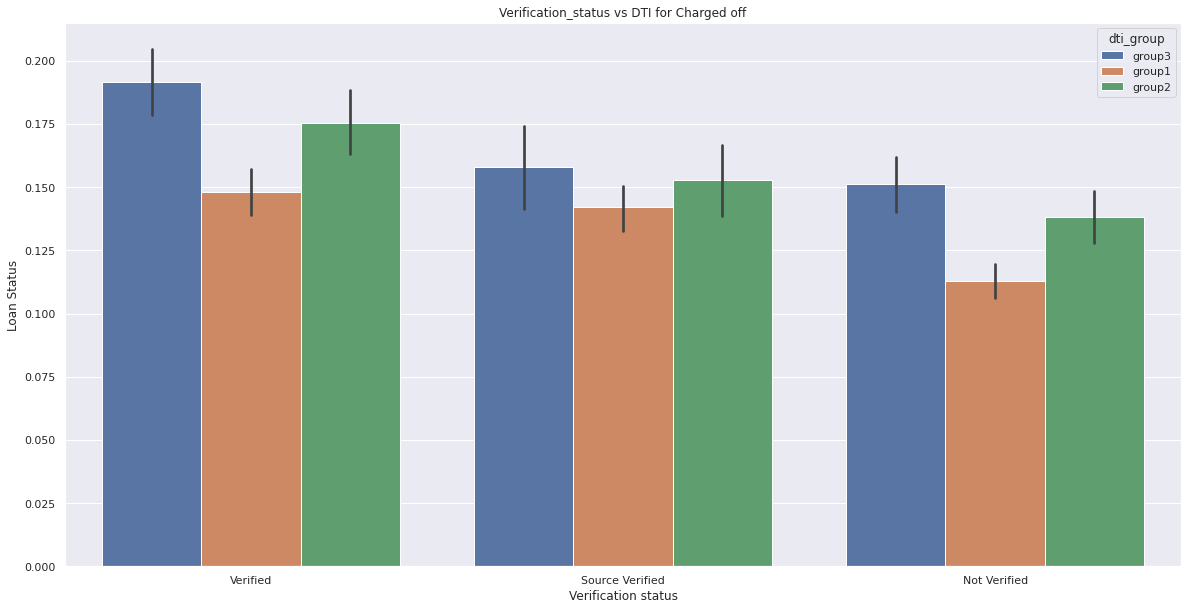

In [117]:
sns.barplot(x='verification_status', y='loan_status_val', hue="dti_group", data=lending_sub)
plt.title('Verification_status vs DTI for Charged off')
plt.xlabel('Verification status')
plt.ylabel('Loan Status')
plt.show();

#####Comparison between **Annual income, Loan Status and DTI** - It is seen that Low income group are the majority defaulter for all DTI. We also see a trend with DTI higher than 18.560000 are majority defaulter except for Higher income group where the DTI ranging from 13.370000 to 18.560000 are majority defaulters.

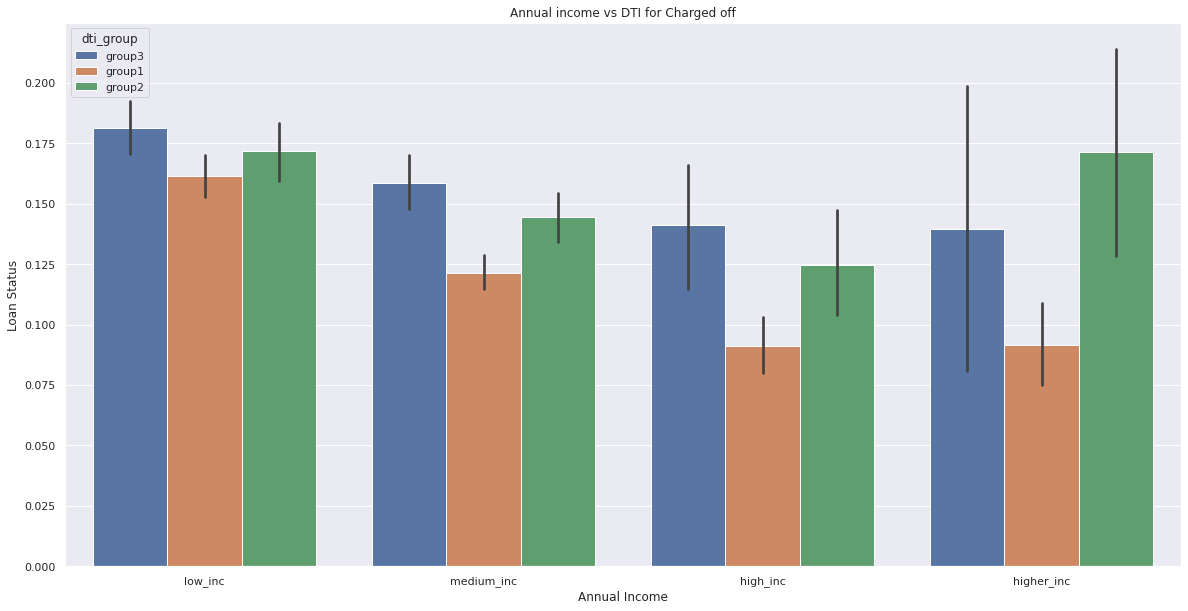

In [118]:
sns.barplot(x='annual_inc_group', y='loan_status_val', hue="dti_group", data=lending_sub)
plt.title('Annual income vs DTI for Charged off')
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.show();

#####Comparison between **Funded amount investor, DTI and Loan status**

In [119]:
lending_sub['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

#####Funded amount investor has value 0 for 27 records which are Charged off. So imputing these records with Funded amount value in investor amount to do the comparison.

In [120]:
lending_sub[lending_sub['funded_amnt_inv'] == 0]['loan_status'].value_counts()

Fully Paid     102
Charged Off     27
Name: loan_status, dtype: int64

#####Replacing zero in funded_amnt_inv with funded_amnt

In [121]:
lending_sub['funded_amnt_inv'] = np.where(lending_sub['funded_amnt_inv'] == 0, lending_sub['funded_amnt'],lending_sub['funded_amnt_inv'])

In [122]:
lending_sub['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [123]:
lending_sub['funded_amnt_inv'].describe()

count    38577.000000
mean     10241.284426
std       7004.294665
min          0.000121
25%       5000.000000
50%       8745.212496
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [124]:
def funded_amnt_inv_grp(i):
    if i <= 5000:
        return '<5000'
    elif i > 5000 and i <=8745.212496:
        return '5000-8745'
    elif i > 8745.212496 and i <=14000:
        return '8745-14000'
    else:
        return '14000+'

lending_sub['funded_amnt_inv_group'] = lending_sub['funded_amnt_inv'].apply(lambda x: funded_amnt_inv_grp(x))
lending_sub['funded_amnt_inv_group'].value_counts()

<5000         10626
8745-14000     9693
14000+         9595
5000-8745      8663
Name: funded_amnt_inv_group, dtype: int64

#####Comparison shows that majority defaulters are those who have requested loan amount more than 14000 (for all DTIs). It even shows a trend on DTI with greater than 18.56 are the majority defaulter.

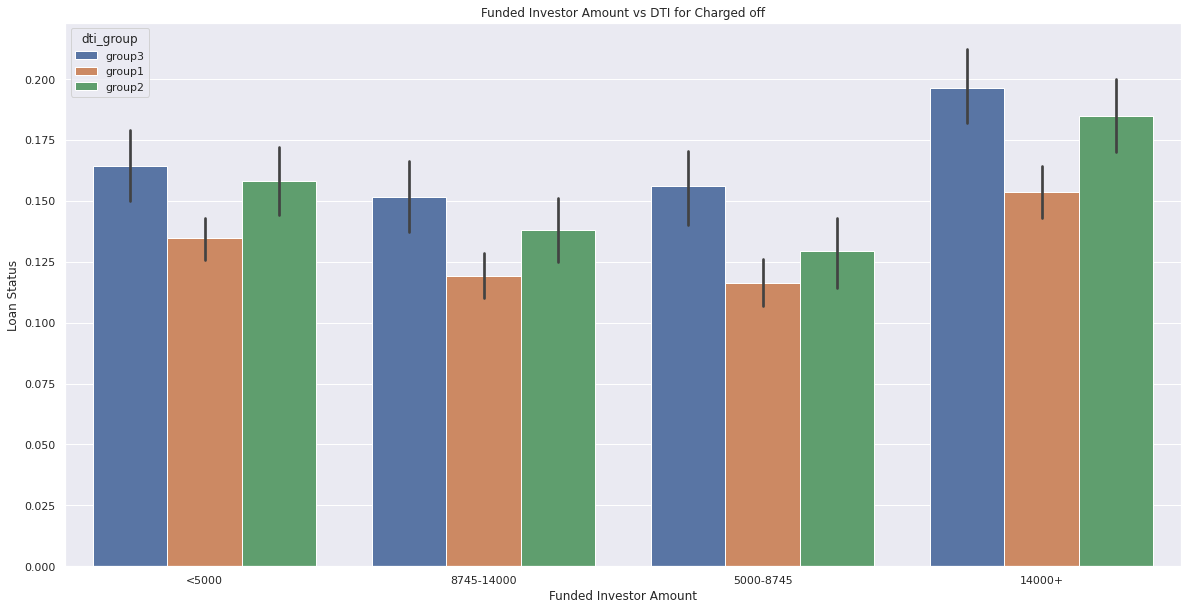

In [125]:
sns.barplot(x='funded_amnt_inv_group', y='loan_status_val', hue="dti_group", data=lending_sub)
plt.title('Funded Investor Amount vs DTI for Charged off')
plt.xlabel('Funded Investor Amount')
plt.ylabel('Loan Status')
plt.show();

#####Comparison between **Employee Length, Loan Status and DTI** shows that Employee with 10+ years experience are the majority defaulters. In general, DTI greater than 18.56 are the majority defaulter except in cases where the employee years of experience are for 4, 7 and 9 years, where DTI between 13.37 to 18.56 are majority defaulters.

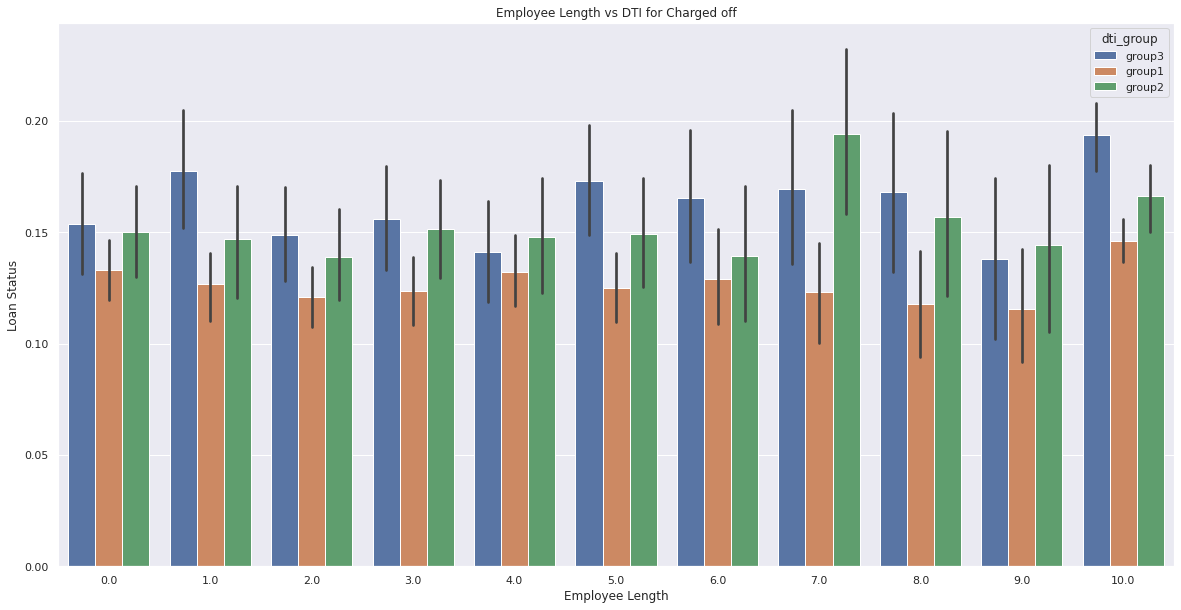

In [126]:
sns.barplot(x='emp_length', y='loan_status_val', hue="dti_group", data=lending_sub)
plt.title('Employee Length vs DTI for Charged off')
plt.xlabel('Employee Length')
plt.ylabel('Loan Status')
plt.show();

#####Comparison between **Employee length, Loan status and Grade** - It can be seen that majority of Defaulters are from Grade G followed by Grade F

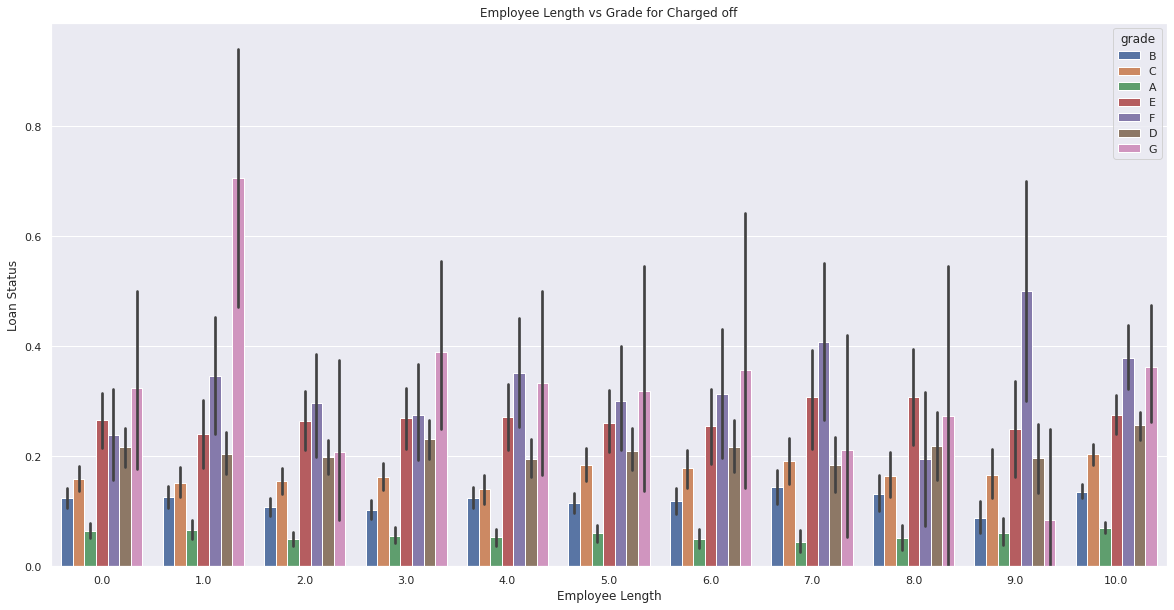

In [127]:
sns.barplot(x='emp_length', y='loan_status_val', hue="grade", data=lending_sub)
plt.title('Employee Length vs Grade for Charged off')
plt.xlabel('Employee Length')
plt.ylabel('Loan Status')
plt.show();

#####Comparison between **Verification Status, Loan status and Grade** - It can be seen that majority of Defaulters are from Grade G followed by Grade F

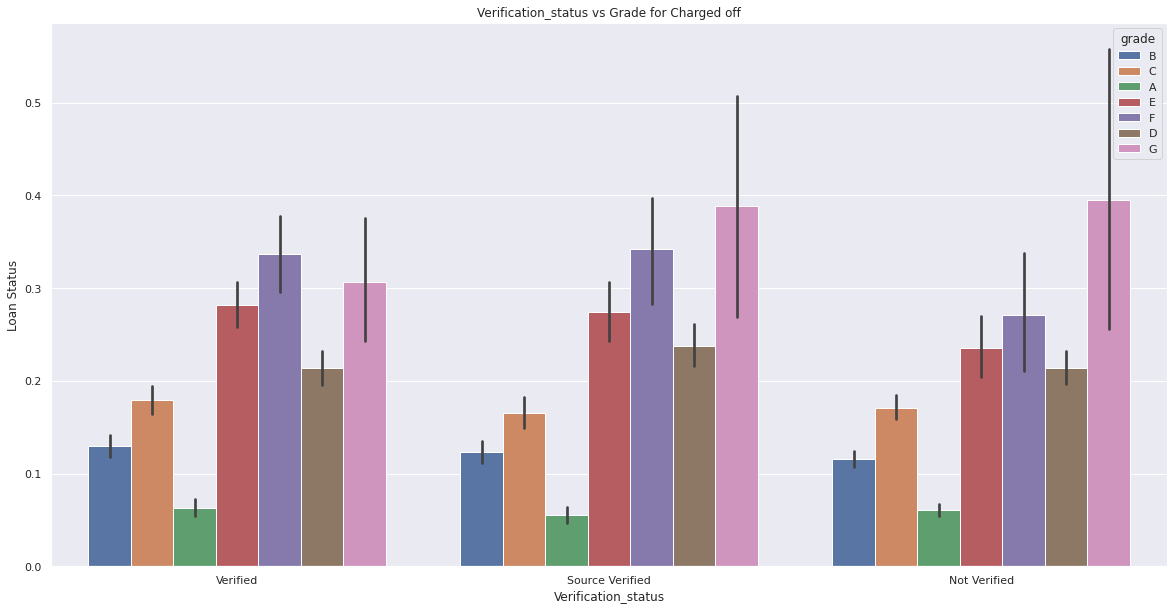

In [128]:
sns.barplot(x='verification_status', y='loan_status_val', hue="grade", data=lending_sub)
plt.title('Verification_status vs Grade for Charged off')
plt.xlabel('Verification_status')
plt.ylabel('Loan Status')
plt.show();

##**Observation and Recommendation** - 

The main features which are strong identifiers of **Defaulters** are **Employee Length, Interest Rate, DTI, Funded Amount Investor, Annual Income, Verification Status, Grade and Home ownership**

1.   It is observed that employee with 10+ years of experience and with term period 60 months with higher defaulter ratio. And in terms of number, we observed that 10+ years with 36 months are more in defaulters.
2.   Maximum defaulters are those who have taken loan for Educational purpose with 60 months as term. And for Small Business, we observed that irrespective of term, the defaulter percentage is high.
3.   Maximum defaulters are those who have taken loan with interest rate between 20-25 and for the analysis we can say that if the loan amount exceeds 15000 then the chances to pay the loan is low.
4.   Maximum defaulters are those who have taken loan with lower annual income (less than 50000) irrespective of installment value.
5.   Maximum defaulters are those who have taken loan with Grade G.
6.   Maximum defaulters are those who have rented properties.
7.   Maximum defaulters are those who are in low income group.
8.   Irrespective of any verification status with DTI more than 18.56 are the majority defaulters. When the Verification status is 'verified',  it is observed that the majority defaulters are from this category which might infer that the verification process needs to be improved so that defaulter ratio gets minimised.
9.   Low income group are the majority defaulter for all DTI. We also observed  a trend with DTI higher than 18.560000 are majority defaulter except for Higher income group where the DTI ranging from 13.370000 to 18.560000 are majority defaulters.
10.  Majority defaulters are those who have requested loan amount more than 14000 (for all DTIs). It even shows a trend on DTI with greater than 18.56 are the majority defaulter.
11.  Employee with 10+ years experience are the majority defaulters. In general, DTI greater than 18.56 are the majority defaulter except in cases where the employee years of experience are for 4, 7 and 9 years, where DTI between 13.37 to 18.56 are majority defaulters.
12. Majority of Defaulters are from Grade G followed by Grade F.